# **The data for the vehicles**

**1. Import library**

In [2]:
import pandas as pd
from datetime import datetime
import missingno as miss
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Naman\AppData\Local\Temp\ipykernel_4272\3284492116.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**2. Load the data**

In [3]:
august_data = pd.read_excel("Aug'23 Service record.xlsx")
october_data = pd.read_excel("Oct'23 Service record.xlsx")
january_data = pd.read_excel("Repair Order Summary-Jan-24.xlsx")
february_data = pd.read_excel("Mobility Feb-24.xlsx")
service_history_data = pd.read_excel("Service History-Bangalore, Delhi, Hyderabad.xlsx")

In [4]:
df = pd.concat([august_data, october_data, january_data, february_data], ignore_index=True)
df.shape

(1659, 41)

In [5]:
df.head()

Job Card           Job Card Date Region               Company  \
0  EVRJC000123853 2023-08-31 17:13:12.383  South       Magnum Ventures   
1  EVRJC000123850 2023-08-31 14:16:07.467  South       Magnum Ventures   
2  EVRJC000123846 2023-08-31 09:37:03.303  South       Magnum Ventures   
3  EVRJC000123845 2023-08-30 17:40:14.740  South       Magnum Ventures   
4  EVRJC000323547 2023-08-30 16:26:53.637  North  Sai Shreeja Auto LLP   

       State       City                      Branch  Branch Code  Dealer Code  \
0  Karnataka  Bengaluru       Magnum Ventures - H.O     300001.0     100001.0   
1  Karnataka  Bengaluru       Magnum Ventures - H.O     300001.0     100001.0   
2  Karnataka  Bengaluru       Magnum Ventures - H.O     300001.0     100001.0   
3  Karnataka  Bengaluru       Magnum Ventures - H.O     300001.0     100001.0   
4      Delhi     Delhi.  Sai Shreeja Auto LLP - H.O     300003.0     100003.0   

        Make  ... Repair order  VIN Customer Name Part/Service Name Amount  \
0  AltiGreen  ...          NaN  NaN           NaN               NaN    NaN   
1  AltiGreen  ...          NaN  NaN           NaN               NaN    NaN   
2  AltiGreen  ...          NaN  NaN           NaN               NaN    NaN   
3  AltiGreen  ...          NaN  NaN           NaN               NaN    NaN   
4  AltiGreen  ...          NaN  NaN           NaN               NaN    NaN   

   Part/Labour Group Sale Date  Lost Sale Value  Job Card Status  ALT  
0                NaN       NaT              NaN              NaN  NaN  
1                NaN       NaT              NaN              NaN  NaN  
2                NaN       NaT              NaN              NaN  NaN  
3                NaN       NaT              NaN              NaN  NaN  
4                NaN       NaT              NaN              NaN  NaN  

[5 rows x 41 columns]

**3. Data Cleaning**

In [6]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df

Job Card           Job Card Date Region Company      State       City  \
366      NaN 2023-10-07 15:23:56.757  South     NaN  Karnataka  Bengaluru   
593      NaN 2023-10-12 10:33:28.600  South     NaN  Karnataka  Bengaluru   
881      NaN 2023-10-28 16:35:58.773  South     NaN  Karnataka  Bengaluru   
999      NaN 2023-10-31 12:23:05.727  North     NaN    HARYANA   GURUGRAM   

    Branch  Branch Code  Dealer Code       Make  ...     Repair order  \
366    NaN          NaN          NaN  AltiGreen  ...  EVRJC0001231114   
593    NaN          NaN          NaN  AltiGreen  ...  EVRJC0001231146   
881    NaN          NaN          NaN  AltiGreen  ...  EVRJC0001231271   
999    NaN          NaN          NaN  AltiGreen  ...   EVRJC004623104   

                   VIN                    Customer Name  \
366  MD93WD6CZPC515030             PI Beam Labs Pvt Ltd   
593  MD93WD6CZPC515026             PI Beam Labs Pvt Ltd   
881  MD93WD6CZPB515492             PI Beam Labs Pvt Ltd   
999  MD93WD6CGNL515183  ELEKTROWAGEN MOTORS THREE LLP     

                                 Part/Service Name Amount  Part/Labour Group  \
366                            ORVM Mirror fitment   30.0             Labour   
593  Rear wheel hub / drum replacement (per wheel)  150.0             Labour   
881                            ORVM Mirror fitment   50.0             Labour   
999        Front Shock Absorber Replacement (1 No)  100.0             Labour   

    Sale Date  Lost Sale Value  Job Card Status  ALT  
366       NaT              NaN              NaN  NaN  
593       NaT              NaN              NaN  NaN  
881       NaT              NaN              NaN  NaN  
999       NaT              NaN              NaN  NaN  

[4 rows x 41 columns]

In [7]:
df = df.drop_duplicates()

In [8]:
df.columns

Index(['Job Card', 'Job Card Date', 'Region', 'Company', 'State', 'City',
       'Branch', 'Branch Code', 'Dealer Code', 'Make', 'Model', 'Model Name',
       'Registration No', 'Chassis No', 'Customer', 'KM Reading',
       'Repair Type', 'Parts Value', 'Inside Service Value',
       'Outside Service Value', 'Basic Amount', 'Discount', 'CGST%', 'CGST',
       'IGST%', 'IGST', 'SGST%', 'SGST', 'Work Status', 'Total Amount',
       'ALT Mob', 'Repair order', 'VIN', 'Customer Name', 'Part/Service Name',
       'Amount', 'Part/Labour Group', 'Sale Date', 'Lost Sale Value',
       'Job Card Status', 'ALT'],
      dtype='object')

In [9]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

Job Card                 47.915408
Job Card Date             0.000000
Region                    0.000000
Company                  47.915408
State                     0.000000
City                      0.000000
Branch                   47.915408
Branch Code              47.915408
Dealer Code              47.915408
Make                      0.000000
Model                     0.000000
Model Name               47.915408
Registration No           0.000000
Chassis No               47.915408
Customer                 47.915408
KM Reading                0.060423
Repair Type               0.000000
Parts Value              47.915408
Inside Service Value     47.915408
Outside Service Value    47.915408
Basic Amount             47.915408
Discount                 47.915408
CGST%                    57.099698
CGST                     57.099698
IGST%                    95.770393
IGST                     95.770393
SGST%                    57.099698
SGST                     57.099698
Work Status         

In [10]:
col_for_drop = null_percent[null_percent>80].keys()
col_for_drop

Index(['IGST%', 'IGST', 'ALT'], dtype='object')

In [11]:
df = df.drop(columns = col_for_drop)
df.shape

(1655, 38)

<Axes: xlabel='Parts Value'>

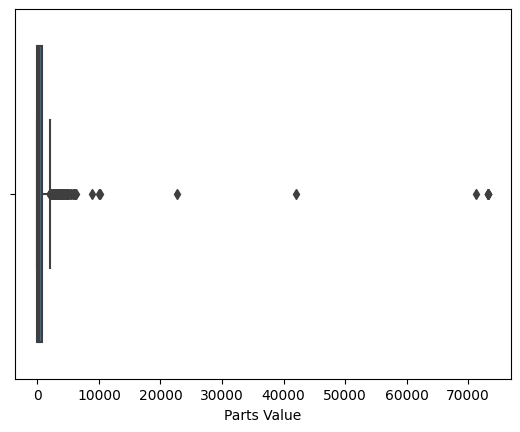

In [12]:
sns.boxplot(x=df['Parts Value'])

<Axes: xlabel='Outside Service Value'>

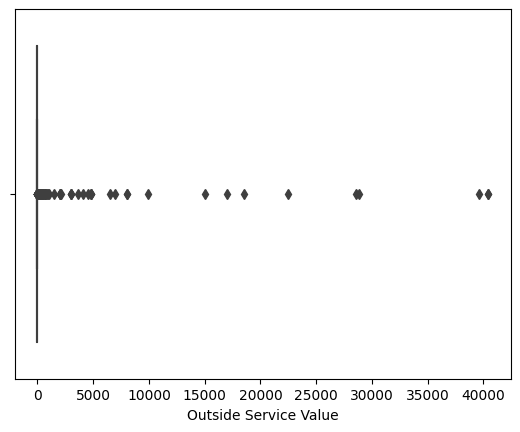

In [13]:
sns.boxplot(x=df['Outside Service Value'])

<Axes: xlabel='Basic Amount'>

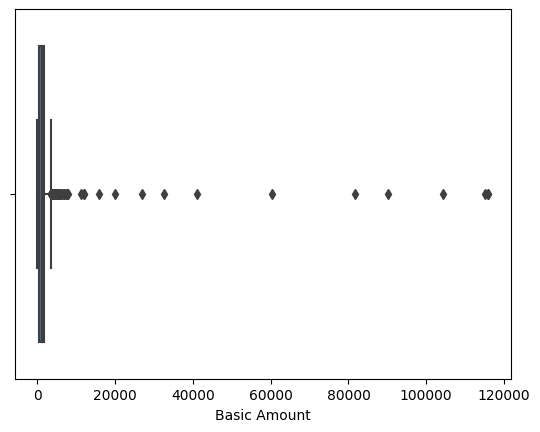

In [14]:
sns.boxplot(x=df['Basic Amount'])

<Axes: xlabel='CGST'>

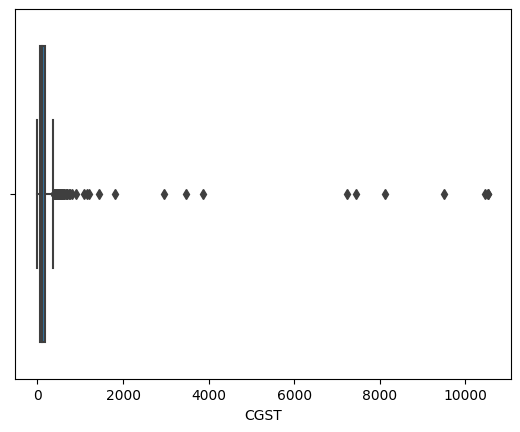

In [15]:
sns.boxplot(x=df['CGST'])

<Axes: xlabel='SGST'>

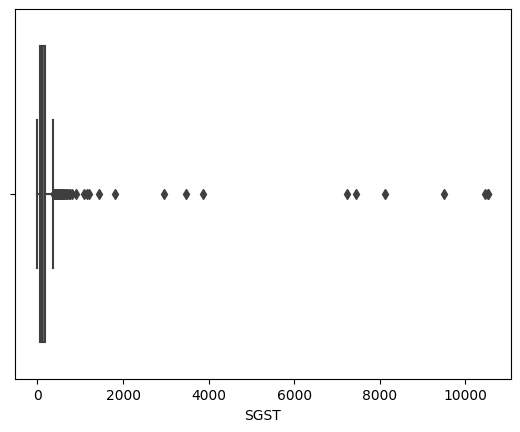

In [16]:
sns.boxplot(x=df['SGST'])

<Axes: xlabel='Total Amount'>

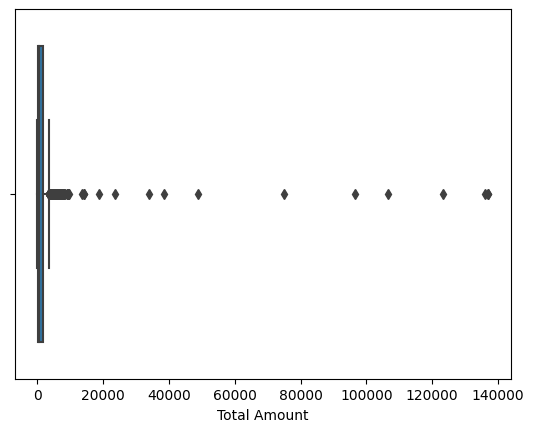

In [17]:
sns.boxplot(x=df['Total Amount'])

In [18]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [19]:
df.dtypes

Job Card                         object
Job Card Date            datetime64[ns]
Region                           object
Company                          object
State                            object
City                             object
Branch                           object
Branch Code                     float64
Dealer Code                     float64
Make                             object
Model                            object
Model Name                       object
Registration No                  object
Chassis No                       object
Customer                         object
KM Reading                      float64
Repair Type                      object
Parts Value                     float64
Inside Service Value            float64
Outside Service Value           float64
Basic Amount                    float64
Discount                        float64
CGST%                           float64
CGST                            float64
SGST%                           float64


In [20]:
df.to_csv('df1.csv', index = False)

In [21]:
# Fill missing values in categorical columns 
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns
for col in categorical_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Naman\AppData\Local\Temp\ipykernel_4272\3273813093.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [22]:
# Filling NaN values in the "Parts Value" column based on subcategories of "City" and "Part/Service Name"
df['Parts Value'] = df.groupby('City')['Parts Value'].transform(lambda x: x.fillna(x.mean()))

# Checking if NaN values have been filled
print(df['Parts Value'].isnull().sum())  # Should print 0 if all NaN values have been filled

0


In [23]:
df['Inside Service Value'] = df.groupby('City')['Inside Service Value'].transform(lambda x: x.fillna(x.mean()))

# Checking if NaN values have been filled
print(df['Inside Service Value'].isnull().sum())  # Should print 0 if all NaN values have been filled

0


In [24]:
df['Outside Service Value'] = df.groupby('City')['Outside Service Value'].transform(lambda x: x.fillna(x.mean()))

# Checking if NaN values have been filled
print(df['Outside Service Value'].isnull().sum())  # Should print 0 if all NaN values have been filled

0


In [25]:
df['Basic Amount'] = df.groupby('City')['Basic Amount'].transform(lambda x: x.fillna(x.mean()))

# Checking if NaN values have been filled
print(df['Basic Amount'].isnull().sum())  # Should print 0 if all NaN values have been filled

0


In [26]:
df['Discount'] = df.groupby('City')['Discount'].transform(lambda x: x.fillna(x.mean()))

# Checking if NaN values have been filled
print(df['Discount'].isnull().sum())  # Should print 0 if all NaN values have been filled

0


In [27]:
df['Amount'] = df.groupby('City')['Amount'].transform(lambda x: x.fillna(x.mean()))
df['Amount'] = df.groupby('State')['Amount'].transform(lambda x: x.fillna(x.mean()))


# Checking if NaN values have been filled
print(df['Amount'].isnull().sum())  # Should print 0 if all NaN values have been filled

0


In [28]:
df['CGST%'] = df['CGST%'].transform(lambda x: x.fillna(x.mean()))

# Checking if NaN values have been filled
print(df['CGST%'].isnull().sum())  # Should print 0 if all NaN values have been filled

0


In [29]:
df['CGST'] = df['CGST'].transform(lambda x: x.fillna(x.mean()))

# Checking if NaN values have been filled
print(df['CGST'].isnull().sum())  # Should print 0 if all NaN values have been filled

0


In [30]:
df['SGST%'] = df.groupby('State')['SGST%'].transform(lambda x: x.fillna(x.mean()))

# Checking if NaN values have been filled
print(df['SGST%'].isnull().sum())  # Should print 0 if all NaN values have been filled

0


In [31]:
df['SGST'] = df.groupby('State')['SGST'].transform(lambda x: x.fillna(x.mean()))

# Checking if NaN values have been filled
print(df['SGST'].isnull().sum())  # Should print 0 if all NaN values have been filled

0


In [32]:
# Fill NaN values in 'Lost Sale Value' column based on median value within each 'City' group
df['Lost Sale Value'] = df.groupby('City')['Lost Sale Value'].transform(lambda x: x.fillna(x.mean()))

# Fill NaN values in 'Lost Sale Value' column based on median value within each 'State' group
df['Lost Sale Value'] = df.groupby('State')['Lost Sale Value'].transform(lambda x: x.fillna(x.mean()))

# Convert 'Lost Sale Value' column to integers
df['Lost Sale Value'] = df['Lost Sale Value'].astype(int)

# Checking if NaN values have been filled
print(df['Lost Sale Value'].isnull().sum())  # Should print 0 if all NaN values have been filled


0


In [33]:
# Fill NaN values in 'KM Reading' column based on mean value within each 'City' group
df['KM Reading'] = df.groupby('City')['KM Reading'].transform(lambda x: x.fillna(x.mean()))

# Fill NaN values in 'KM Reading' column based on mean value within each 'State' group
df['KM Reading'] = df.groupby('State')['KM Reading'].transform(lambda x: x.fillna(x.mean()))

# Checking if NaN values have been filled
print(df['KM Reading'].isnull().sum())  # Should print 0 if all NaN values have been filled


0


In [34]:
# Fill NaN values in 'Branch Code' column based on the most frequent value within each 'City' group
df['Branch Code'] = df.groupby('City')['Branch Code'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Fill NaN values in 'Branch Code' column based on the most frequent value within each 'State' group
df['Branch Code'] = df.groupby('State')['Branch Code'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Checking if NaN values have been filled
print(df['Branch Code'].isnull().sum())  # Should print 0 if all NaN values have been filled


0


In [35]:
# Fill NaN values in 'Dealer Code' column based on the most common value within each 'City' group
df['Dealer Code'] = df.groupby('City')['Dealer Code'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Fill NaN values in 'Dealer Code' column based on the most common value within each 'State' group
df['Dealer Code'] = df.groupby('State')['Dealer Code'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Checking if NaN values have been filled
print(df['Dealer Code'].isnull().sum())  # Should print 0 if all NaN values have been filled


0


In [36]:
# First, convert 'Sale Date' column to datetime
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

# Sort the DataFrame by subcategories
df_sorted = df.sort_values(by=['Customer', 'Model Name', 'Job Card Date'])

# Forward fill and backward fill 'Sale Date' column within subcategories
df['Sale Date'] = df_sorted.groupby(['Customer', 'Model Name'])['Sale Date'].ffill().bfill()


# Checking if NaN values have been filled
print(df['Sale Date'].isnull().sum())  # Should print 0 if all NaN values have been filled

0


In [37]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

Job Card                 0.0
Job Card Date            0.0
Region                   0.0
Company                  0.0
State                    0.0
City                     0.0
Branch                   0.0
Branch Code              0.0
Dealer Code              0.0
Make                     0.0
Model                    0.0
Model Name               0.0
Registration No          0.0
Chassis No               0.0
Customer                 0.0
KM Reading               0.0
Repair Type              0.0
Parts Value              0.0
Inside Service Value     0.0
Outside Service Value    0.0
Basic Amount             0.0
Discount                 0.0
CGST%                    0.0
CGST                     0.0
SGST%                    0.0
SGST                     0.0
Work Status              0.0
Total Amount             0.0
ALT Mob                  0.0
Repair order             0.0
VIN                      0.0
Customer Name            0.0
Part/Service Name        0.0
Amount                   0.0
Part/Labour Gr

In [38]:
df.to_csv('df2.csv', index = False)

<Axes: >

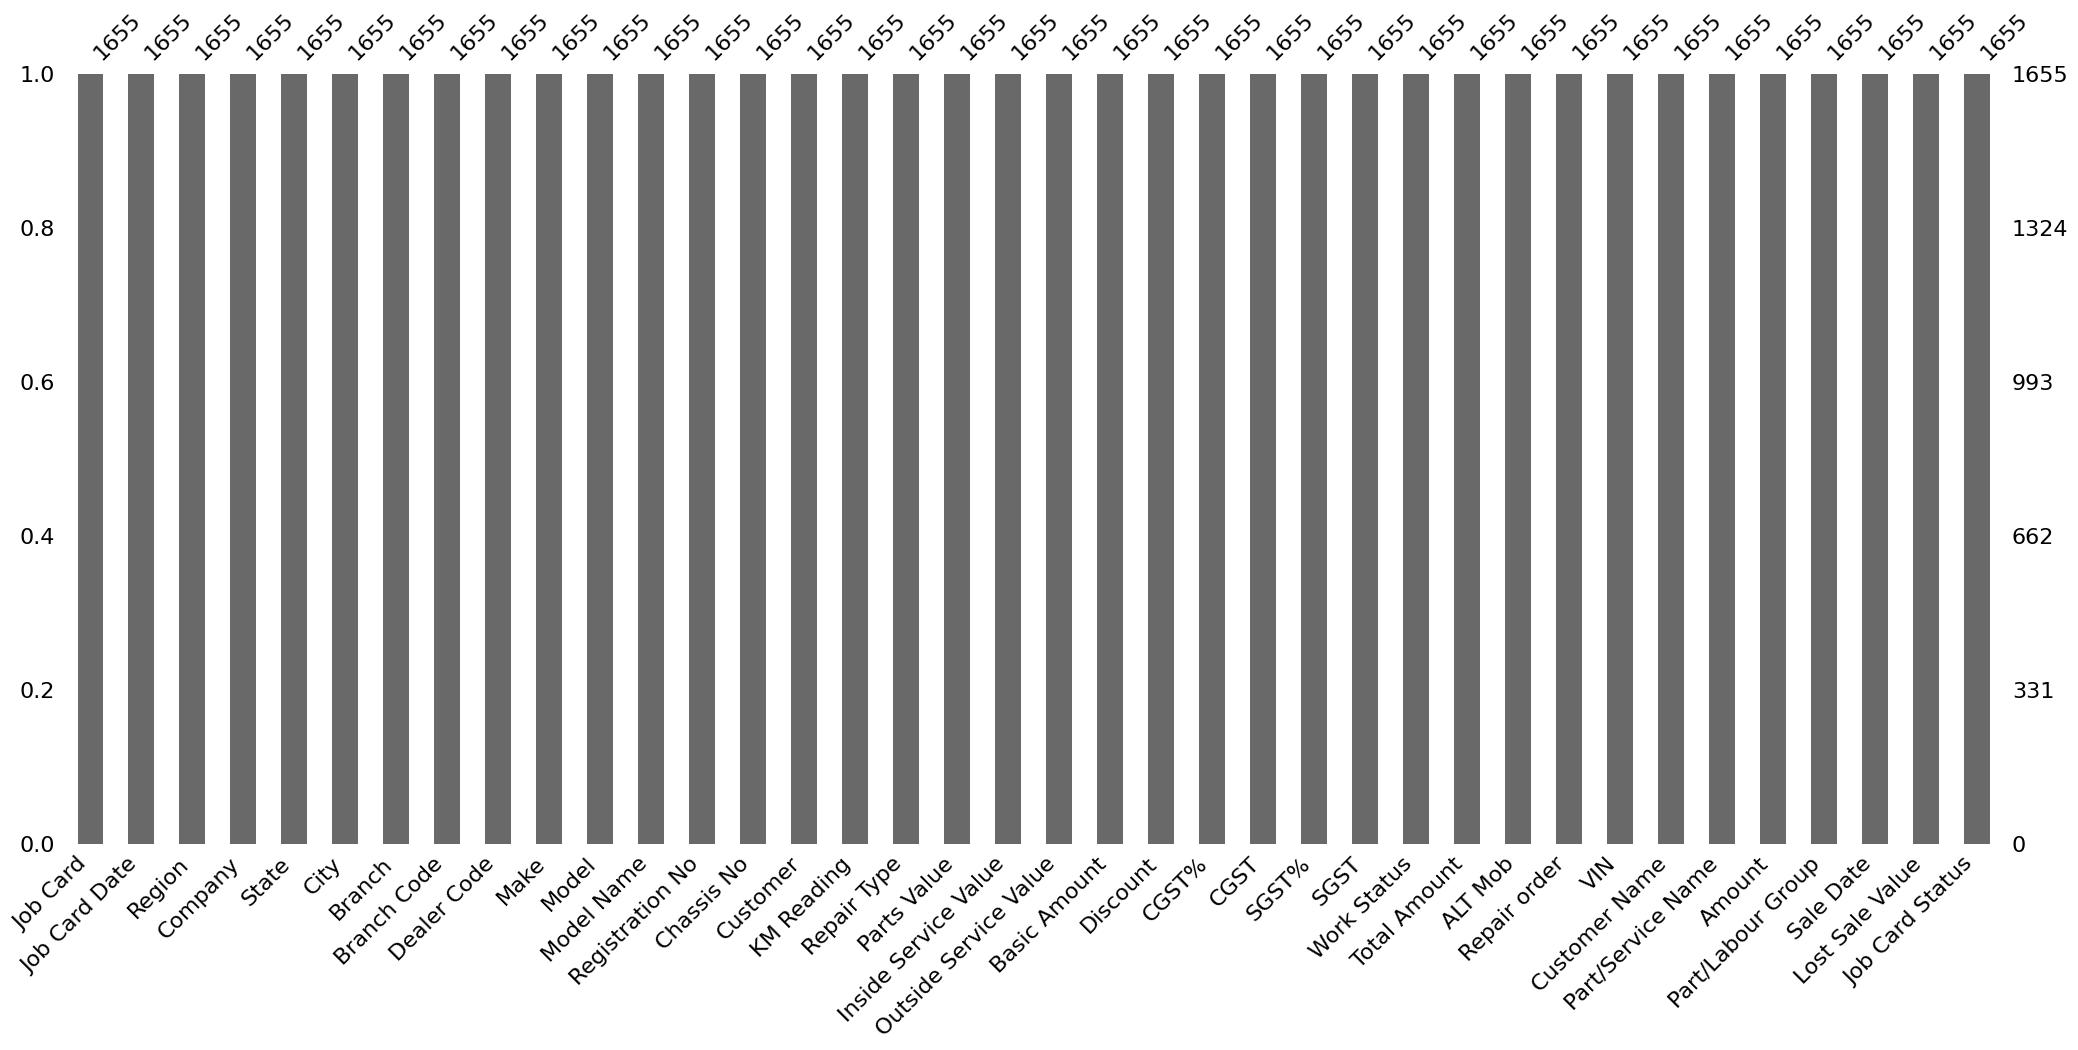

In [39]:
miss.bar(df)

**4. Data Exploration**

Text(0.5, 1.0, 'Heatmap using correlation matrix of vehicles')

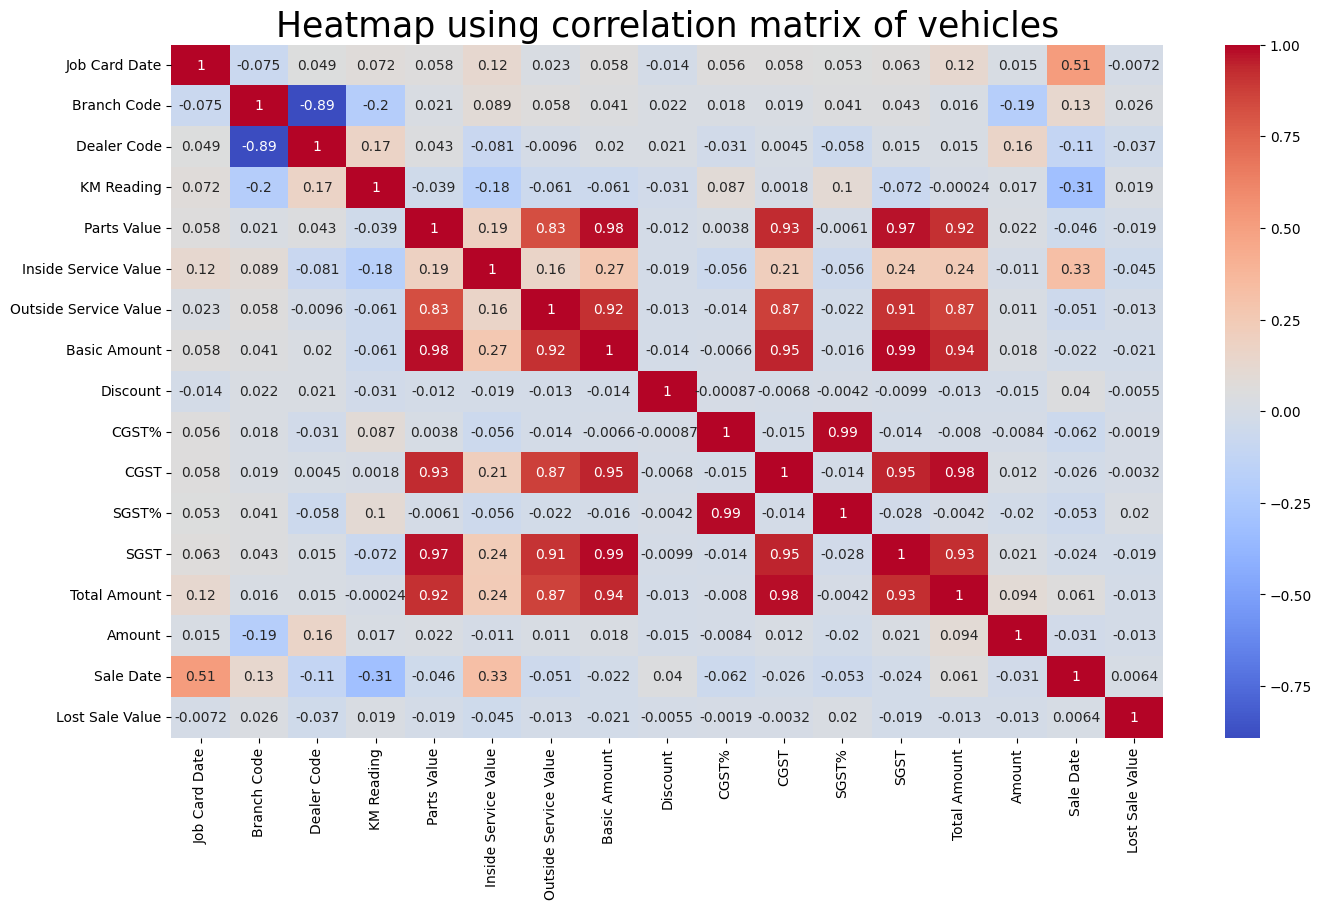

In [42]:
# Heatmap
numeric_columns = df.select_dtypes(exclude=['object']).columns
plt.figure(figsize=(16,9)) # heatmap size in ratio 16:9
 
sns.heatmap(df[numeric_columns].corr(), annot = True, cmap ='coolwarm') # show heatmap
 
plt.title("Heatmap using correlation matrix of vehicles", fontsize = 25) # title of heatmap

In [44]:
hig_corr = df[numeric_columns].corr()
hig_corr_features1 = hig_corr.index[abs(hig_corr["Parts Value"]) >= 0.5]
hig_corr_features1

Index(['Parts Value', 'Outside Service Value', 'Basic Amount', 'CGST', 'SGST',
       'Total Amount'],
      dtype='object')

(6.5, -0.5)

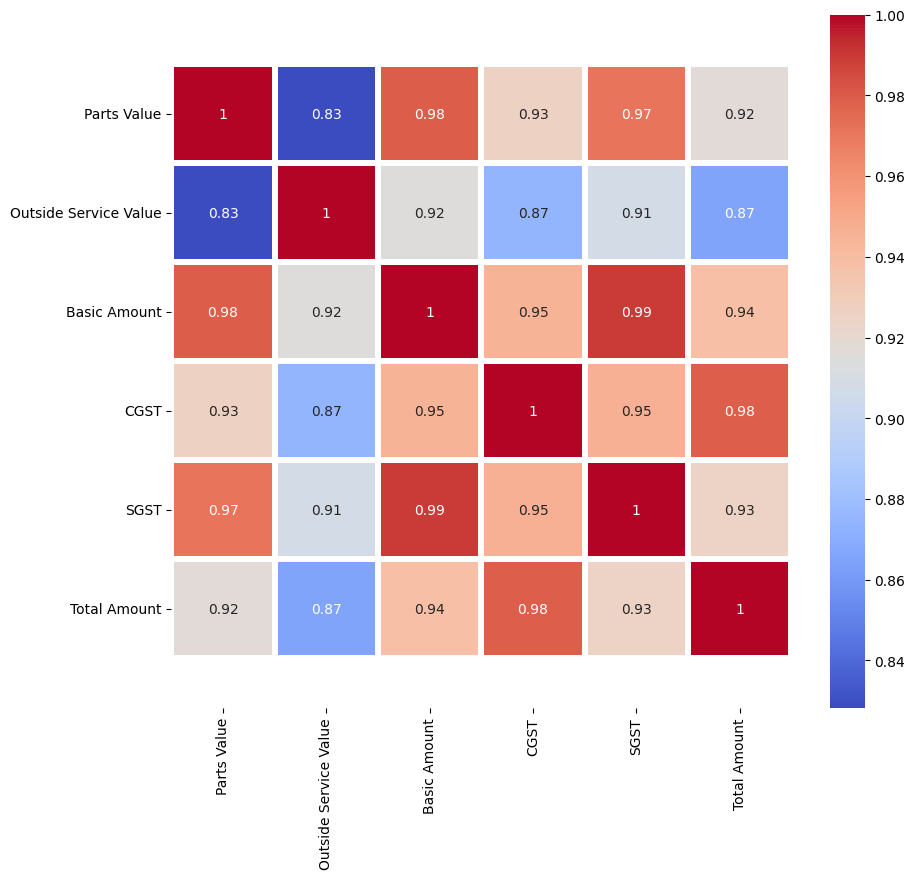

In [46]:
plt.figure(figsize = (10,9))
ax = sns.heatmap(df[hig_corr_features1].corr(), cmap = "coolwarm", annot = True, linewidth =3)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+ 0.5, top -0.5)

**5. Linear pattern observed between Parts Value and Outside Service Value.**

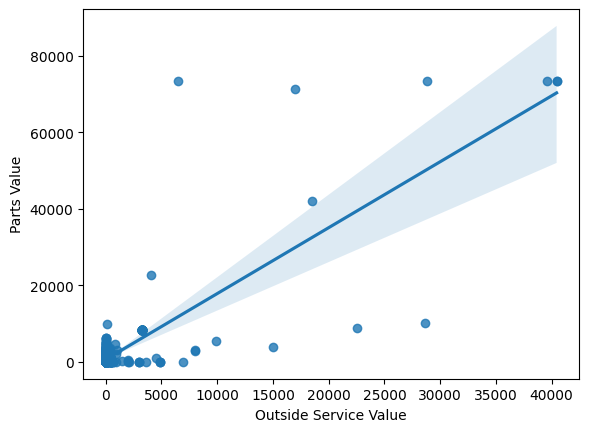

In [49]:
for i in range(len(hig_corr_features1)):
    if i+1<2:
        plt.subplot(1,1,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data = df[numeric_columns], x = hig_corr_features1[i+1], y = "Parts Value")

**6. Linear pattern observed between Parts Value and Basic Amount.**

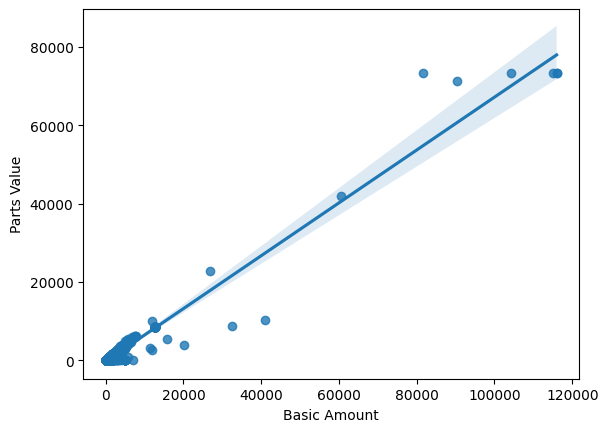

In [52]:
for i in range(len(hig_corr_features1)):
    if i+2<3:
        plt.subplot(1,1,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data = df[numeric_columns], x = hig_corr_features1[i+2], y = "Parts Value")

**7. Linear pattern observed between Parts Value and CGST.**

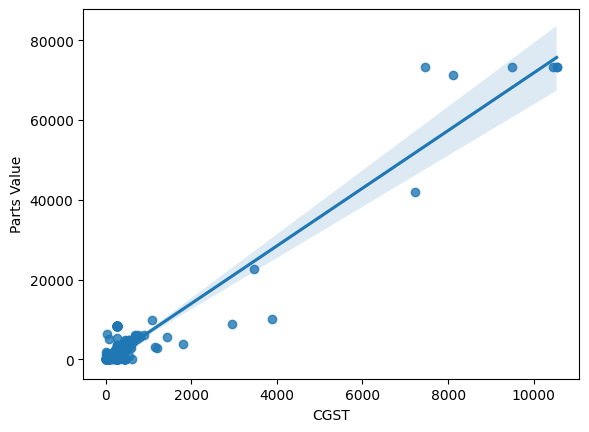

In [53]:
for i in range(len(hig_corr_features1)):
    if i+3<4:
        plt.subplot(1,1,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data = df[numeric_columns], x = hig_corr_features1[i+3], y = "Parts Value")

**8. Linear pattern observed between Parts Value and SGST.**

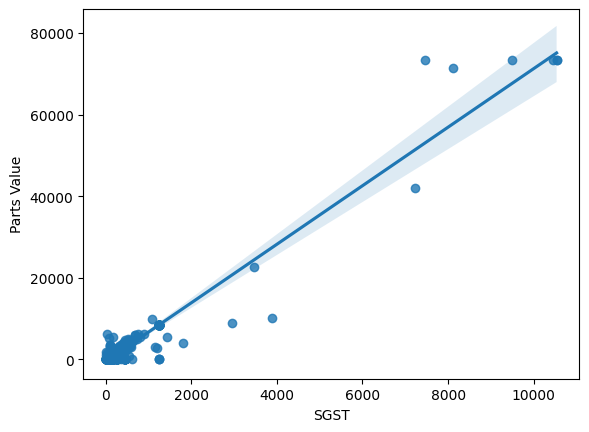

In [54]:
for i in range(len(hig_corr_features1)):
    if i+4<5:
        plt.subplot(1,1,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data = df[numeric_columns], x = hig_corr_features1[i+4], y = "Parts Value")

**9. Linear pattern observed between Parts Value and Total Amount.**

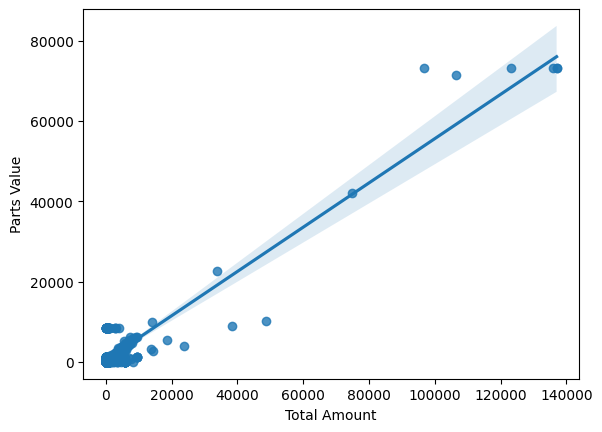

In [55]:
for i in range(len(hig_corr_features1)):
    if i+5<6:
        plt.subplot(1,1,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data = df[numeric_columns], x = hig_corr_features1[i+5], y = "Parts Value")

In [56]:
hig_corr = df[numeric_columns].corr()
hig_corr_features3 = hig_corr.index[abs(hig_corr["Dealer Code"]) >= 0.5]
hig_corr_features3

Index(['Branch Code', 'Dealer Code'], dtype='object')

**10. Pattern observed between Dealer Code and Branch Code.**

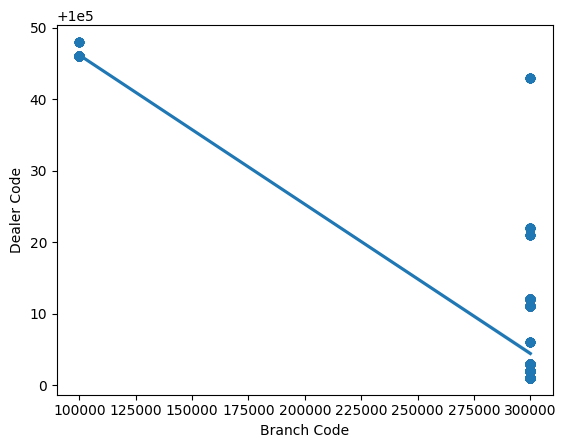

In [57]:
#plt.figure(figsize = (16,9))
for i in range(len(hig_corr_features3)):
    if i<1:
        plt.subplot(1,1,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data = df[numeric_columns], x = hig_corr_features3[i], y = "Dealer Code")

In [58]:
hig_corr = df[numeric_columns].corr()
hig_corr_features2 = hig_corr.index[abs(hig_corr["CGST%"]) >= 0.5]
hig_corr_features2

Index(['CGST%', 'SGST%'], dtype='object')

**11. Pattern observed between CGST% and SGST%.**

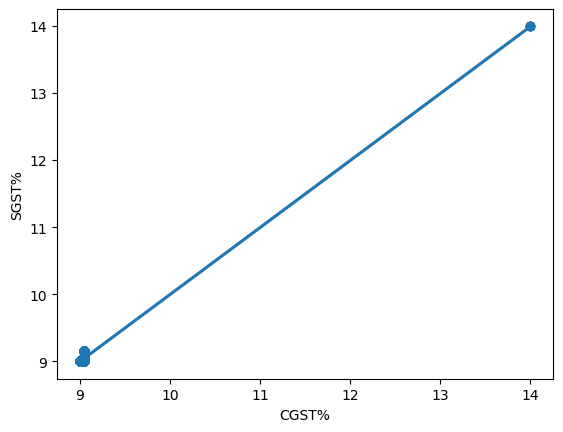

In [59]:
for i in range(len(hig_corr_features3)):
    if i<1:
        plt.subplot(1,1,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data = df[numeric_columns], x = hig_corr_features2[i], y = "SGST%")

In [60]:
df.to_csv('df.csv', index = False)

**12. Mean Time Between Failures (MTBF)**:
   Calculate the time between consecutive failures for each vehicle (based on VIN or Chassis No.) and then find the mean of these times. This will give you an idea of how frequently vehicles experience failures on average.

Mean Time Between Failures (days): 0.12852458592245508


C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


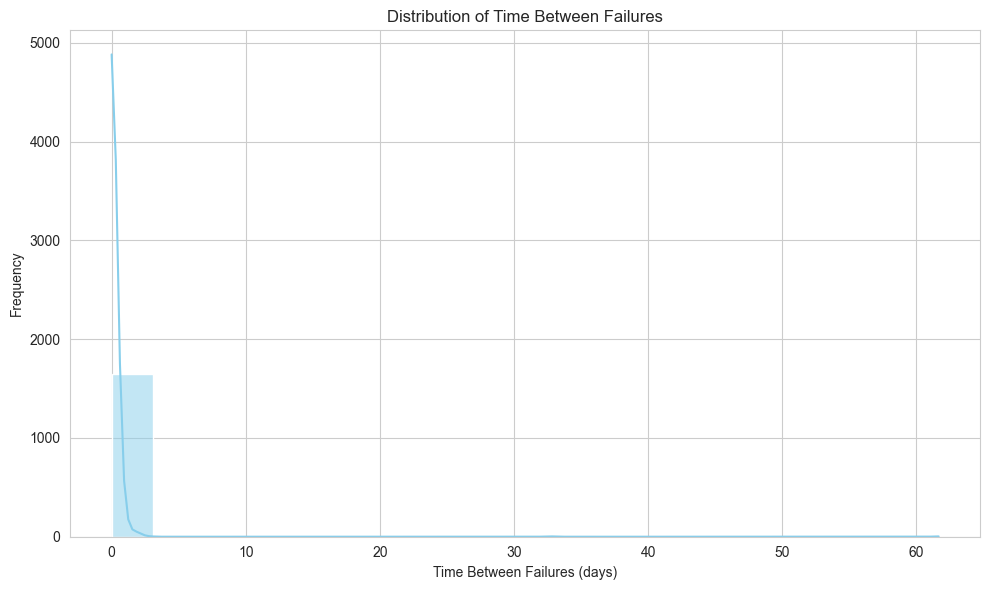

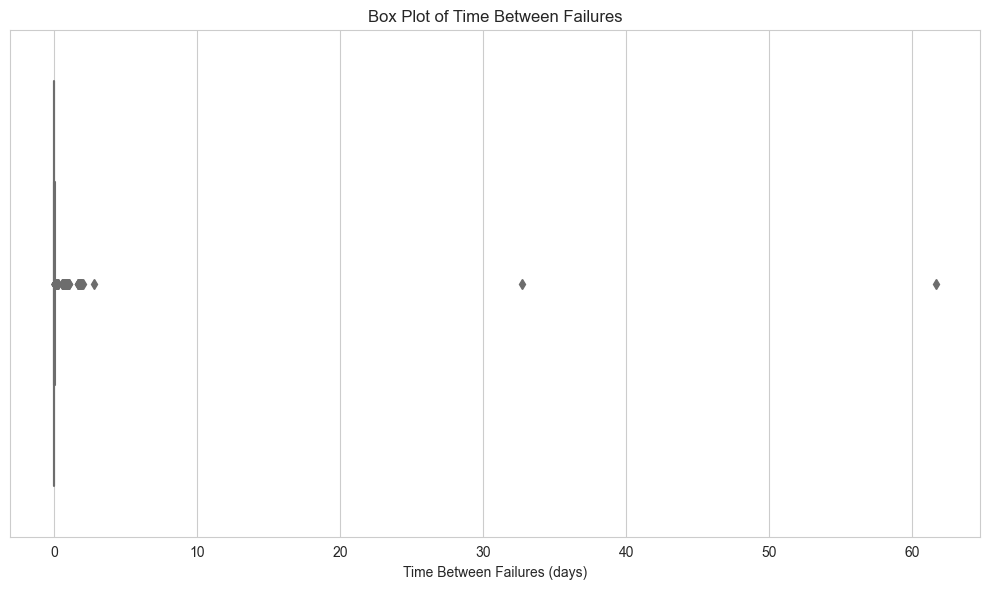

In [61]:
df['Job Card Date'] = pd.to_datetime(df['Job Card Date'], format='%M:%S.%f')

# Sort the DataFrame by Job Card Date
df.sort_values(by='Job Card Date', inplace=True)

# Calculate time between failures
df['Time Between Failures'] = df['Job Card Date'].diff().dt.total_seconds() / (60*60*24)
# Mean time between failures
mean_time_between_failures = df['Time Between Failures'].mean()
print("Mean Time Between Failures (days):", mean_time_between_failures)

# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the histogram of time between failures
plt.figure(figsize=(10, 6))
sns.histplot(df['Time Between Failures'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Time Between Failures')
plt.xlabel('Time Between Failures (days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plotting the box plot of time between failures
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Time Between Failures'], color='salmon')
plt.title('Box Plot of Time Between Failures')
plt.xlabel('Time Between Failures (days)')
plt.tight_layout()
plt.show()

**13. Most Frequent Spare Part Changed**:
   Count the occurrences of each spare part in the "Part/Service Name" column. The part with the highest count is the most frequently changed spare part.


Most Frequent Spare Part Changed: AGP EV Gear Oil [650 ML]


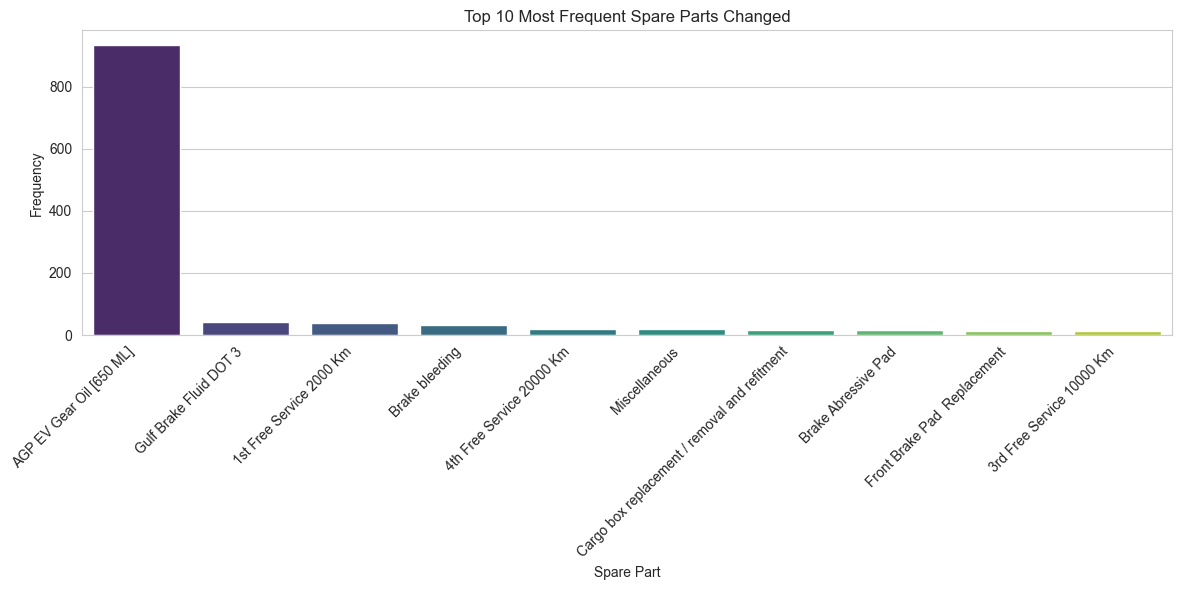

In [62]:
# Most frequent spare part changed
most_frequent_spare_part = df['Part/Service Name'].mode()[0]

print("Most Frequent Spare Part Changed:", most_frequent_spare_part)
# Set the style of seaborn
sns.set_style("whitegrid")

# Count the frequency of each spare part
spare_part_counts = df['Part/Service Name'].value_counts().head(10)

# Plotting the bar plot of spare part frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=spare_part_counts.index, y=spare_part_counts.values, palette='viridis')
plt.title('Top 10 Most Frequent Spare Parts Changed')
plt.xlabel('Spare Part')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**14. Repair Type Analysis**:
   Analyze the distribution of repair types (e.g., Paid, Warranty, Accidental Paid, etc.) to understand the most common reasons for service visits.


Repair Type Analysis:
Repair Type
Paid                    677
Running Repair          355
Warranty                318
Third Free Service      139
First Free Service       65
Fourth Free Service      61
PDI                      16
Accidental Insurance     14
Second Free Service       7
Accidental Paid           3
Name: count, dtype: int64


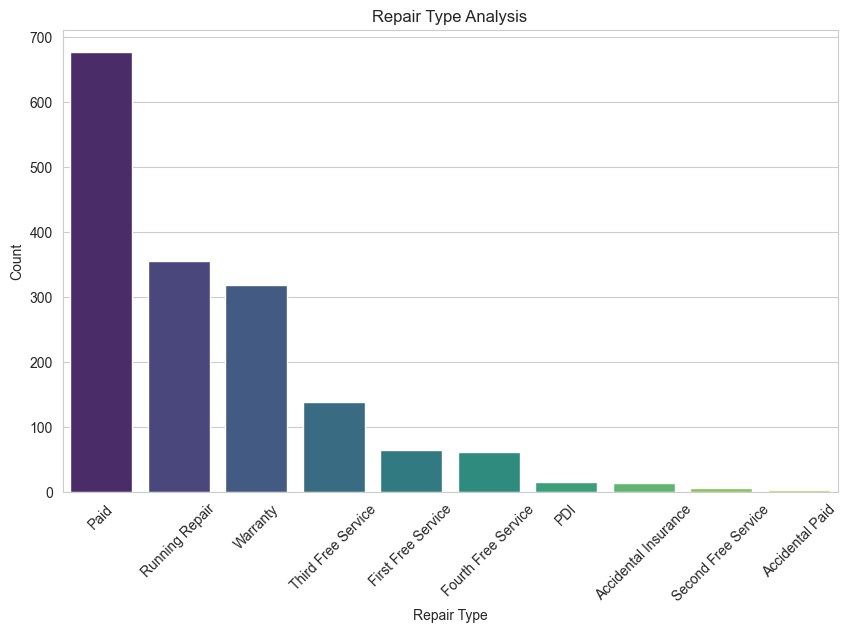

In [63]:
# Count of each repair type
repair_type_counts = df['Repair Type'].value_counts()
print("Repair Type Analysis:")
print(repair_type_counts)
# Count of each repair type
repair_type_counts = df['Repair Type'].value_counts()

# Plotting the count of each repair type
plt.figure(figsize=(10, 6))
sns.barplot(x=repair_type_counts.index, y=repair_type_counts.values, palette="viridis")
plt.title('Repair Type Analysis')
plt.xlabel('Repair Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**15. Geographical Analysis**:
   Analyze the distribution of service records by region, state, and city to identify any geographical patterns or trends.


Geographical Analysis:
Region Counts:
Region
South    1146
North     314
West      182
East       13
Name: count, dtype: int64

State Counts:
State
Karnataka      622
Telangana      401
Delhi          170
HARYANA        144
Gujarat        128
TamilNadu      123
Maharashtra     54
West Bengal     13
Name: count, dtype: int64

City Counts:
City
Bengaluru    622
HYDERABAD    401
GURUGRAM     144
Delhi.       139
Ahmedabad    128
Chennai      123
New Delhi     31
Thane         23
MUMBAI        19
Kolkata       13
Pune          12
Name: count, dtype: int64


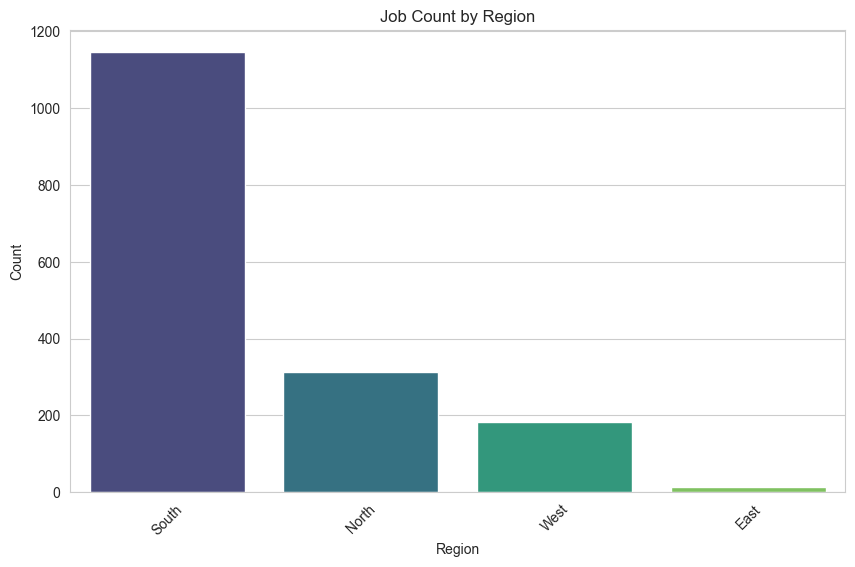

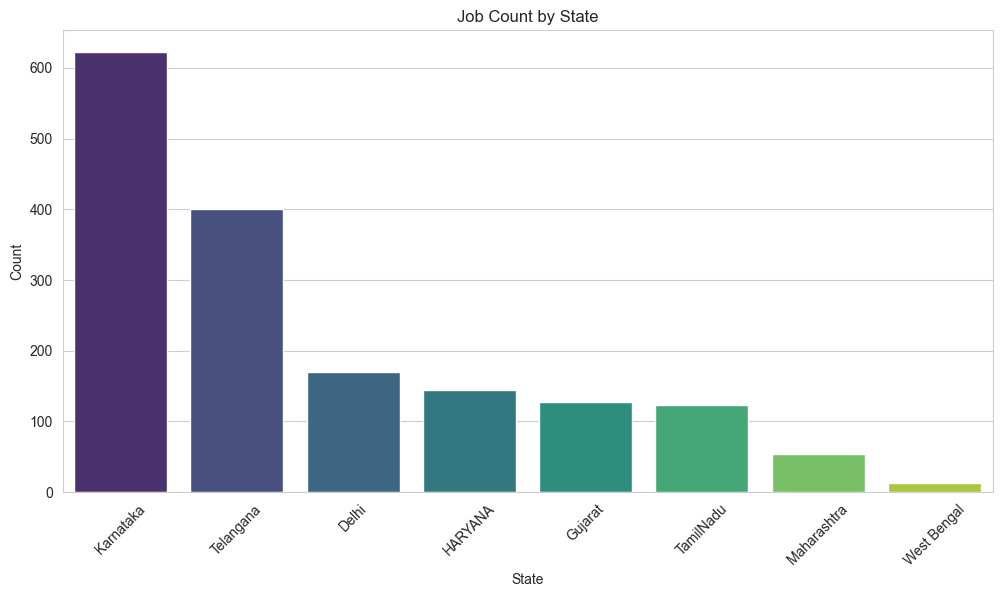

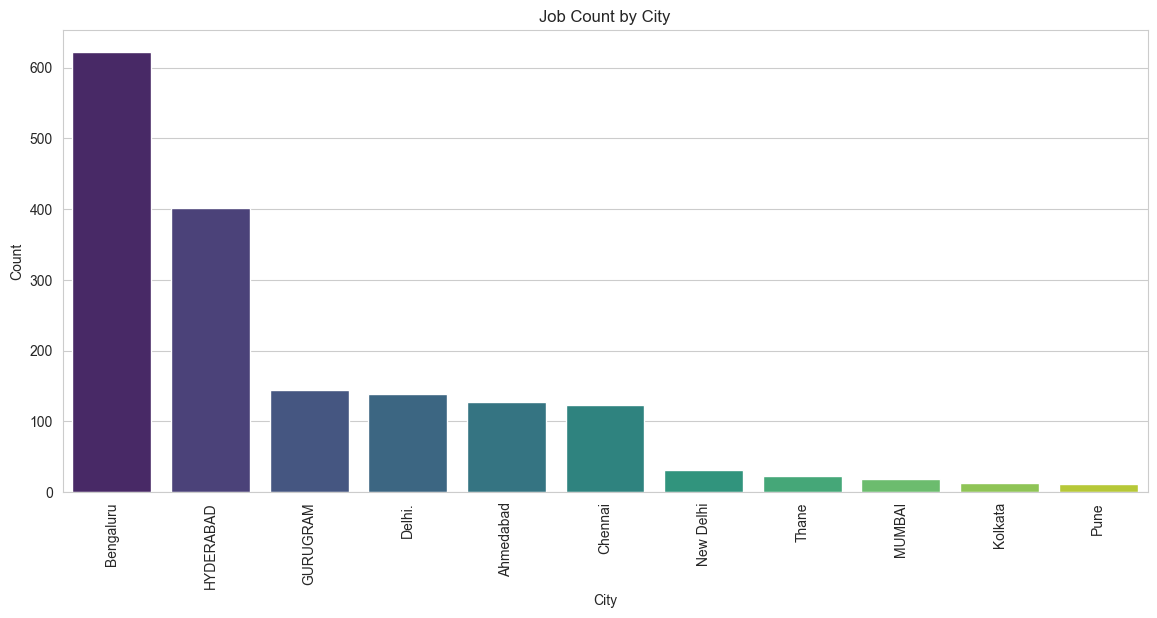

In [64]:
# Count of jobs by region, state, and city
region_counts = df['Region'].value_counts()
state_counts = df['State'].value_counts()
city_counts = df['City'].value_counts()

print("Geographical Analysis:")
print("Region Counts:")
print(region_counts)
print("\nState Counts:")
print(state_counts)
print("\nCity Counts:")
print(city_counts)

# Plotting the count of jobs by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title('Job Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting the count of jobs by state
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.title('Job Count by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting the count of jobs by city
plt.figure(figsize=(14, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.title('Job Count by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


**16. Customer Analysis**:
   Analyze customer behavior, such as the frequency of visits, types of repairs requested, and total expenditure.

                                  Customer  Visit Frequency  \
0          3 ECO SYSTEMS PRIVATE LIMITED                  1   
1             CABT ELEKTRA PRIVATE LIMITED                3   
2                DARSHEEL QUICK TRANSPORTS                1   
3         ELEKTROWAGEN  MOTORS THREE LLP                 17   
4             ELEKTROWAGEN MOTOR THREE LLP               12   
5           ELEKTROWAGEN MOTOR THREE LLP                  2   
6                      ELEKTROWAGEN MOTORS               30   
7                ELEKTROWAGEN MOTORS LLP                 17   
8            ELEKTROWAGEN MOTORS THREE LLP               15   
9          ELEKTROWAGEN MOTORS THREE LLP                 84   
10       EXPONENT ENERGY PRIVATE LIMITED                  1   
11          Elektrowagen Motors Four LLP                  1   
12           Elektrowagen Motors One LLP                  4   
13         Exponent Energy Private Limited               28   
14   LIGHTNING LOGISTICS PRIVATE LIMITED               

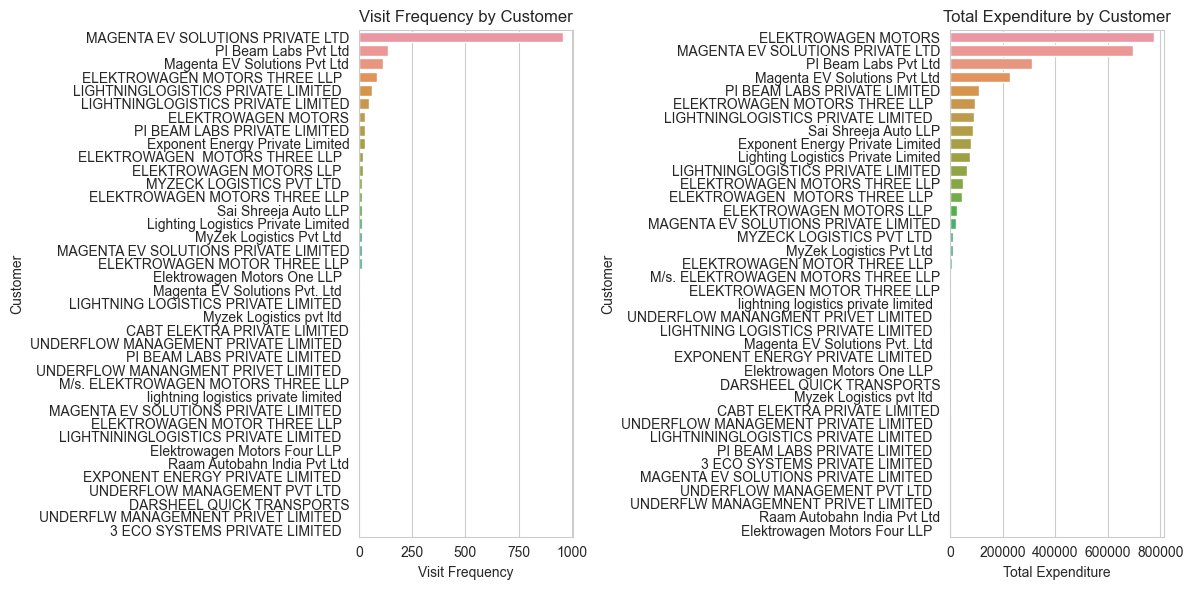

In [65]:
# Extracting year and month from 'Job Card Date' for analysis
df['YearMonth'] = df['Job Card Date'].dt.to_period('M')

# Grouping by Customer and calculating the frequency of visits, types of repairs requested, and total expenditure
customer_analysis = df.groupby('Customer').agg({
    'Job Card': 'count',
    'Repair Type': pd.Series.mode,
    'Total Amount': 'sum'
}).reset_index()

customer_analysis.columns = ['Customer', 'Visit Frequency', 'Most Frequent Repair', 'Total Expenditure']

print(customer_analysis)

# Visualizing using matplotlib and seaborn
plt.figure(figsize=(12, 6))

# Plotting visit frequency
plt.subplot(1, 2, 1)
sns.barplot(x='Visit Frequency', y='Customer', data=customer_analysis.sort_values(by='Visit Frequency', ascending=False))
plt.title('Visit Frequency by Customer')
plt.xlabel('Visit Frequency')
plt.ylabel('Customer')

# Plotting total expenditure
plt.subplot(1, 2, 2)
sns.barplot(x='Total Expenditure', y='Customer', data=customer_analysis.sort_values(by='Total Expenditure', ascending=False))
plt.title('Total Expenditure by Customer')
plt.xlabel('Total Expenditure')
plt.ylabel('Customer')

plt.tight_layout()
plt.show()

**17. Service History Analysis**:
   Extract insights from the service history data, such as the frequency of free services, warranty repairs, and general checkups.

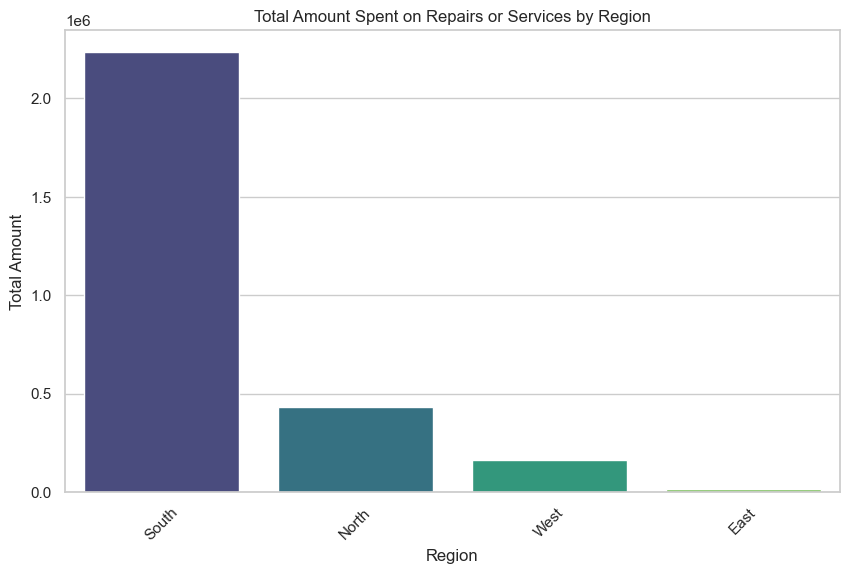

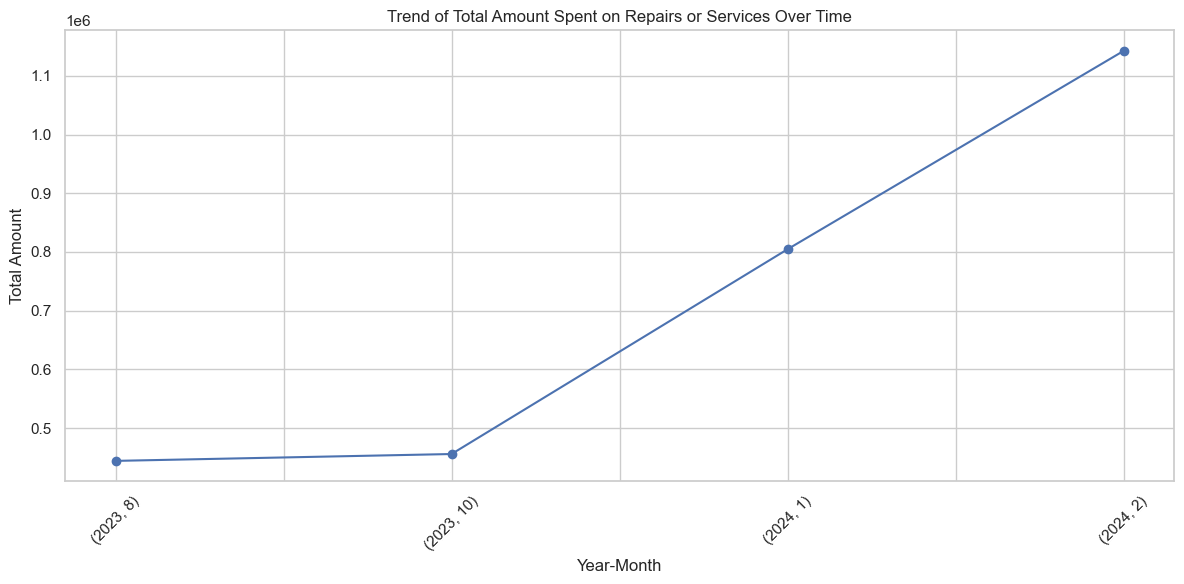

In [96]:
# Service History Analysis - Total Amount Spent on Repairs or Services
total_amount_by_region = df.groupby('Region')['Total Amount'].sum().sort_values(ascending=False)

# Plotting the total amount spent on repairs or services by region
plt.figure(figsize=(10, 6))
sns.barplot(x=total_amount_by_region.index, y=total_amount_by_region.values, palette="viridis")
plt.title('Total Amount Spent on Repairs or Services by Region')
plt.xlabel('Region')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

# Service History Analysis - Trends over Time (if applicable)
# Assuming 'Job Card Date' is in datetime format, if not, convert it to datetime first
df['Job Card Date'] = pd.to_datetime(df['Job Card Date'])

# Extracting year and month from Job Card Date
df['Year'] = df['Job Card Date'].dt.year
df['Month'] = df['Job Card Date'].dt.month

# Total amount spent on repairs or services over time
total_amount_over_time = df.groupby(['Year', 'Month'])['Total Amount'].sum()

# Plotting the trend of total amount spent over time
plt.figure(figsize=(12, 6))
total_amount_over_time.plot(marker='o', color='b')
plt.title('Trend of Total Amount Spent on Repairs or Services Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**18. Work Status Analysis**:
   Analyze the work status descriptions to identify common issues or tasks performed during service visits.

Work Status Analysis:
Work Status
1/1 Parts Job Done , 1/1 RO Job Done.                          1052
2/2 Parts Job Done , 1/1 RO Job Done.                            90
1/1 RO Job Done.                                                 77
1/1 WO Job Done.                                                 40
2/2 Parts Job Done , 2/2 RO Job Done.                            33
3/3 Parts Job Done , 1/1 RO Job Done.                            27
2/2 RO Job Done.                                                 25
3/3 RO Job Done.                                                 22
3/3 Parts Job Done , 2/2 RO Job Done.                            20
1/1 Parts Job Done , 2/2 RO Job Done.                            18
4/4 Parts Job Done , 2/2 RO Job Done.                            17
4/4 Parts Job Done , 1/1 RO Job Done.                            14
4/4 Parts Job Done , 3/3 RO Job Done.                            12
5/5 Parts Job Done , 3/3 RO Job Done.                            12
5/5 Parts Job 

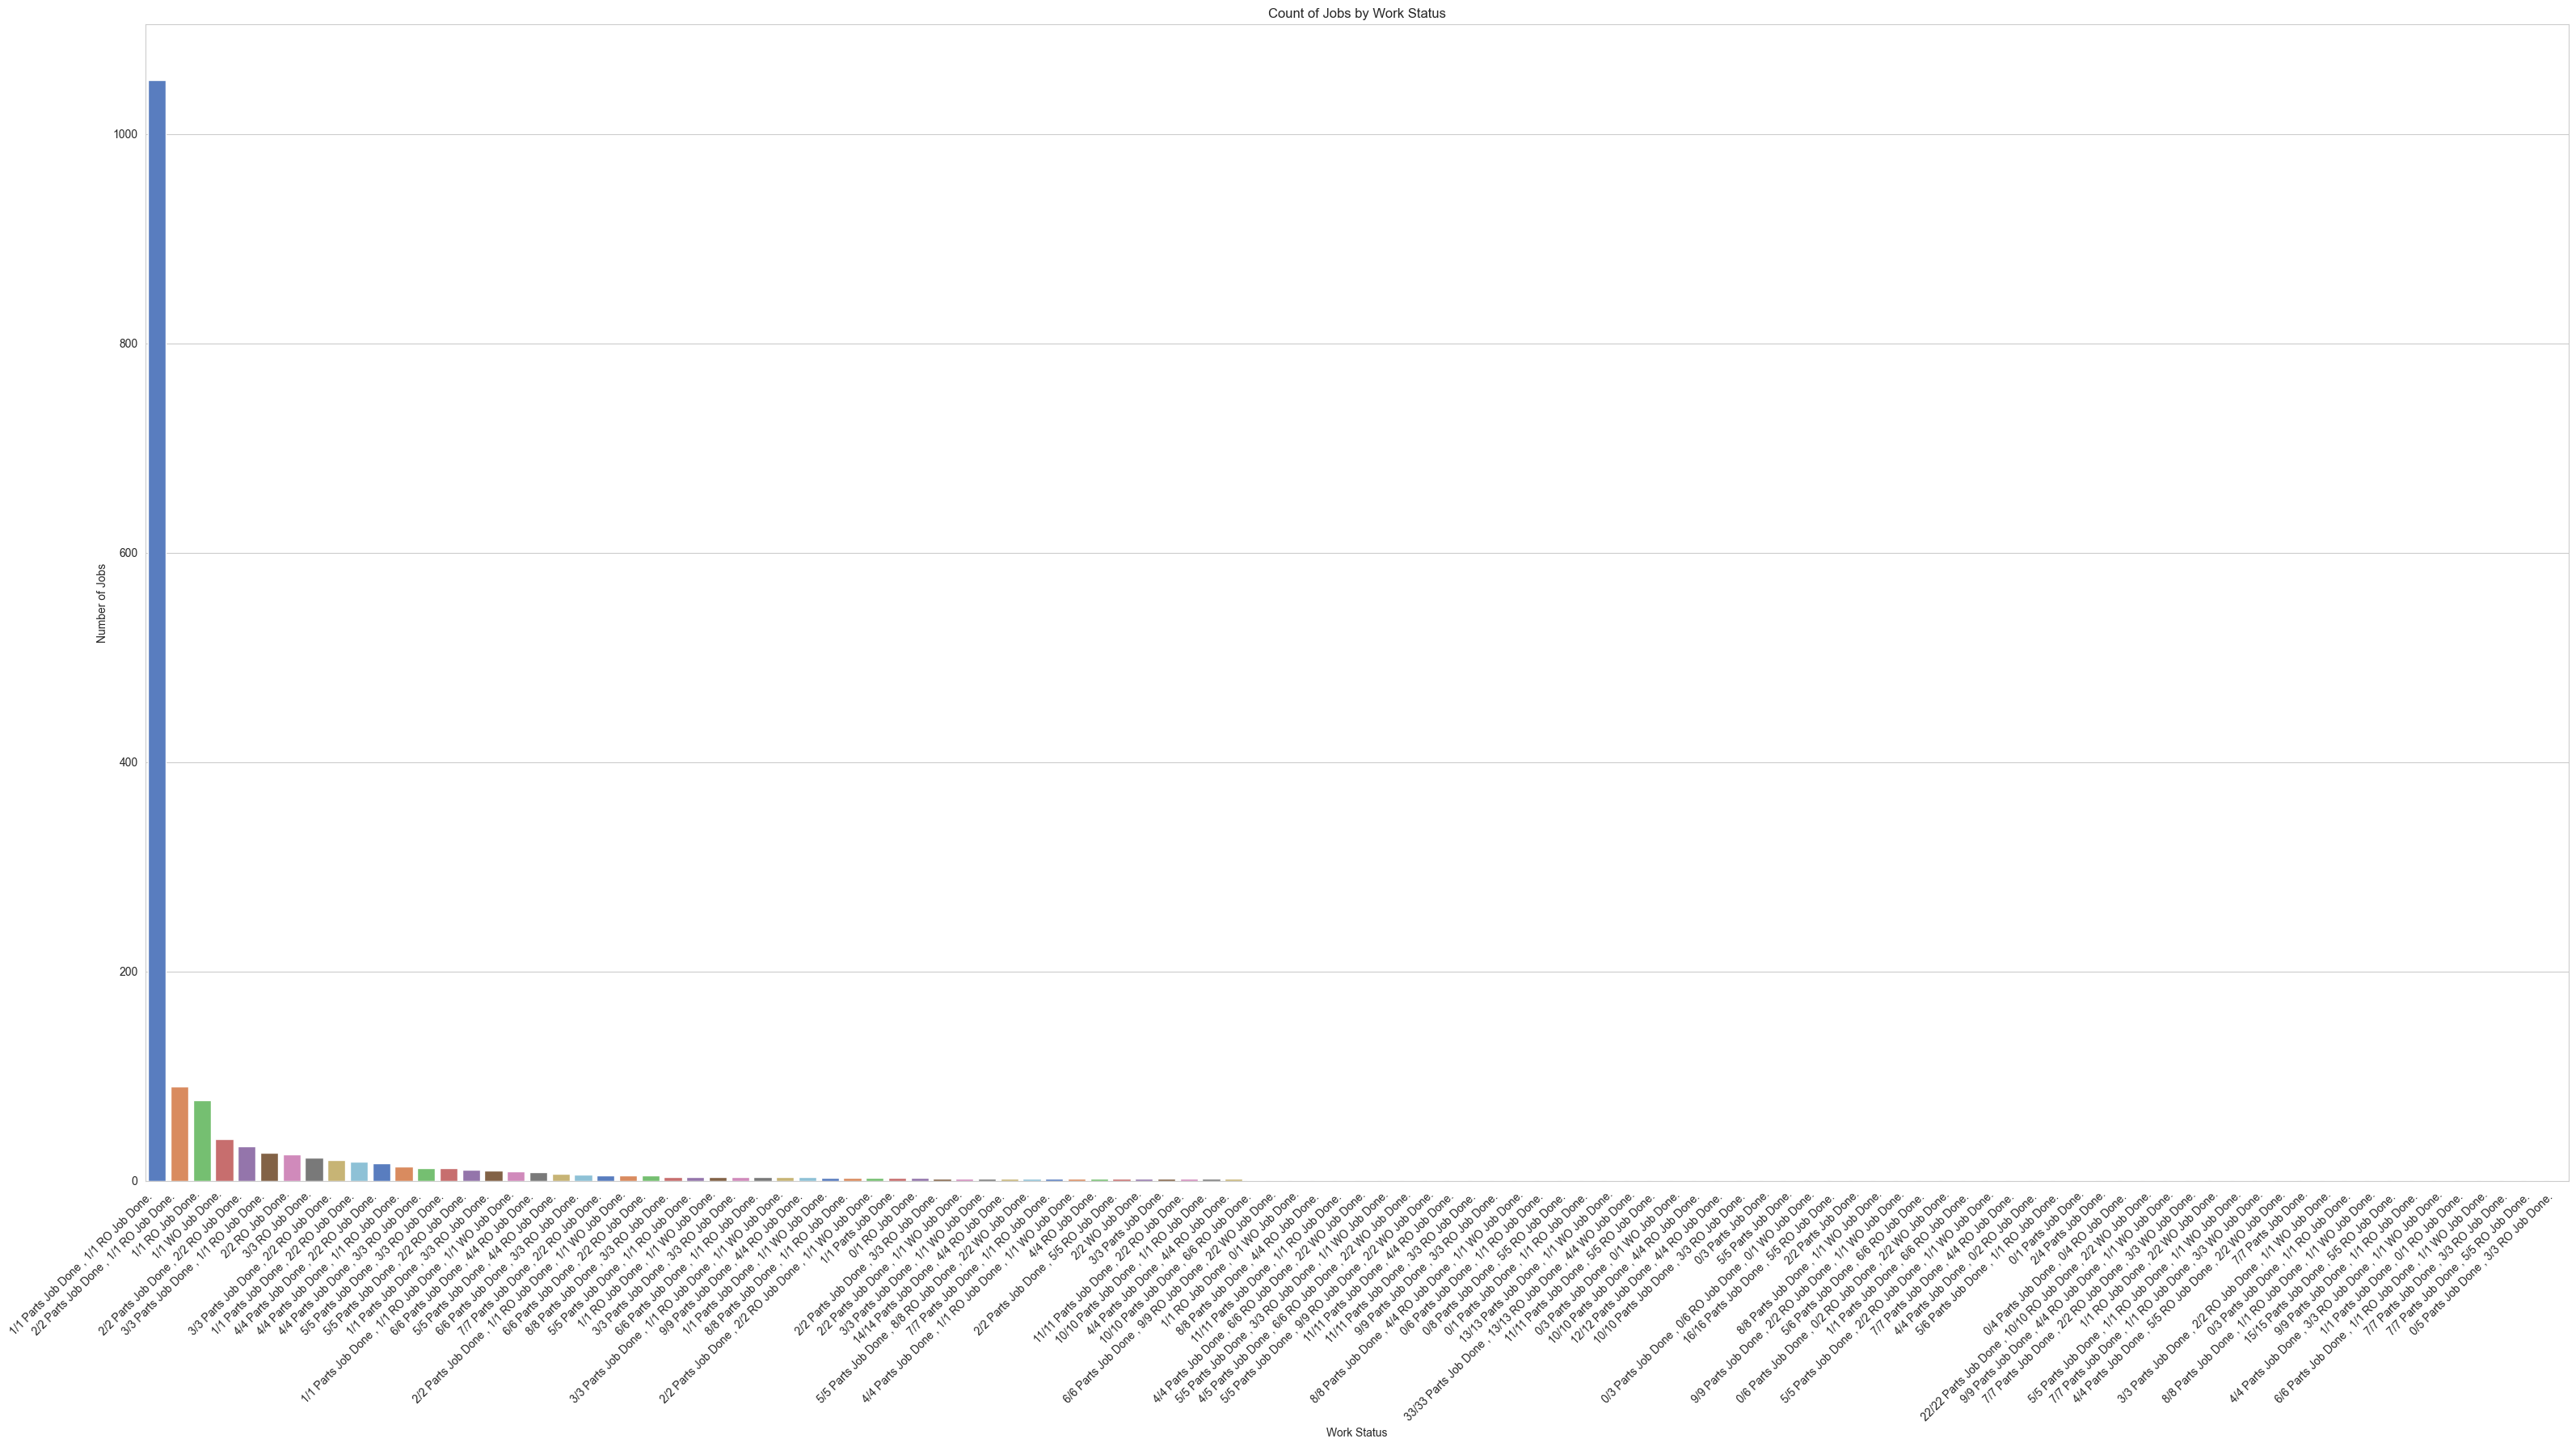

In [67]:
# Count of jobs by work status
work_status_counts = df['Work Status'].value_counts()
print("Work Status Analysis:")
print(work_status_counts)
# Plotting the count of jobs by work status
plt.figure(figsize=(32, 18))
sns.barplot(x=work_status_counts.index, y=work_status_counts.values, palette="muted")
plt.title('Count of Jobs by Work Status')
plt.xlabel('Work Status')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**19. Time Analysis**:
   Analyze the timestamps to identify patterns related to the time of day, day of the week, or month when service visits are most frequent.

time_of_day_counts
Job Card Date
9      31
10    140
11    193
12    192
13    175
14    163
15    220
16    235
17    188
18     98
19     17
21      2
23      1
dtype: int64
day_of_week_counts
Day_of_Week
0    233
1    349
2    278
3    334
4    243
5    209
6      9
dtype: int64
month_counts
Month
1     305
2     285
8     272
10    793
dtype: int64


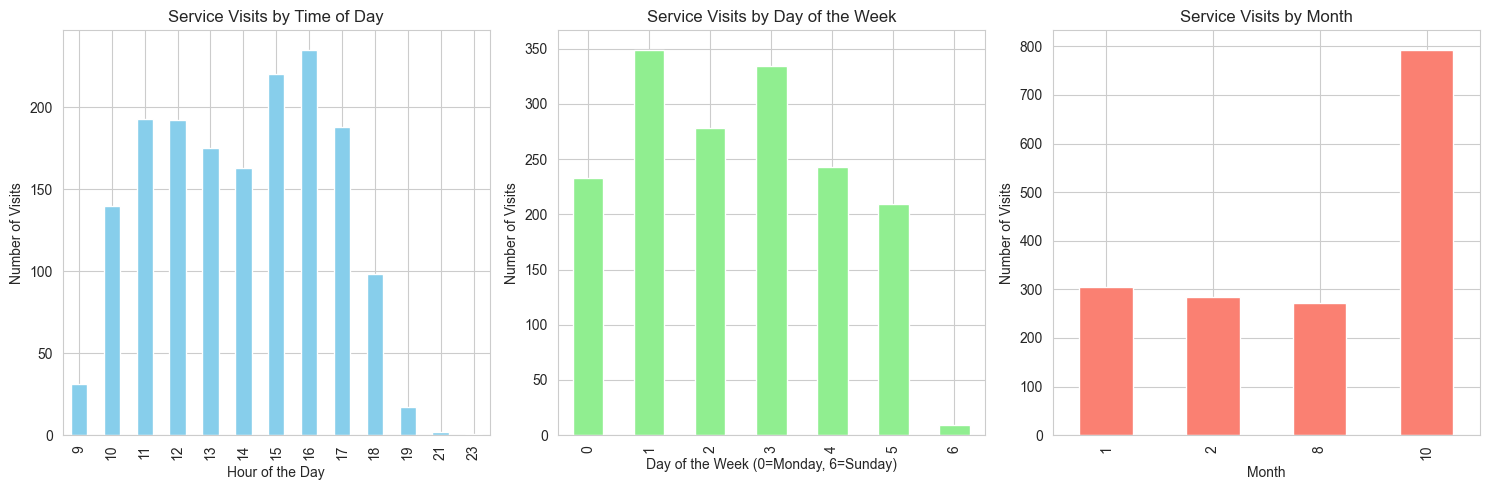

In [68]:
# Convert 'Job Card Date' to datetime format
df['Job Card Date'] = pd.to_datetime(df['Job Card Date'])

# Extract date, time, day of the week, and month
df['Date'] = df['Job Card Date'].dt.date
df['Time'] = df['Job Card Date'].dt.time
df['Day_of_Week'] = df['Job Card Date'].dt.dayofweek
df['Month'] = df['Job Card Date'].dt.month

# Group by time of day
time_of_day_counts = df.groupby(df['Job Card Date'].dt.hour).size()
print('time_of_day_counts')
print(time_of_day_counts)

# Group by day of the week
day_of_week_counts = df.groupby(df['Day_of_Week']).size()
print('day_of_week_counts')
print(day_of_week_counts)

# Group by month
month_counts = df.groupby(df['Month']).size()
print('month_counts')
print(month_counts)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
time_of_day_counts.plot(kind='bar', color='skyblue')
plt.title('Service Visits by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Visits')

plt.subplot(1, 3, 2)
day_of_week_counts.plot(kind='bar', color='lightgreen')
plt.title('Service Visits by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Visits')

plt.subplot(1, 3, 3)
month_counts.plot(kind='bar', color='salmon')
plt.title('Service Visits by Month')
plt.xlabel('Month')
plt.ylabel('Number of Visits')

plt.tight_layout()
plt.show()



**20. Company Distribution**: Analyze the distribution of companies to identify key clients.

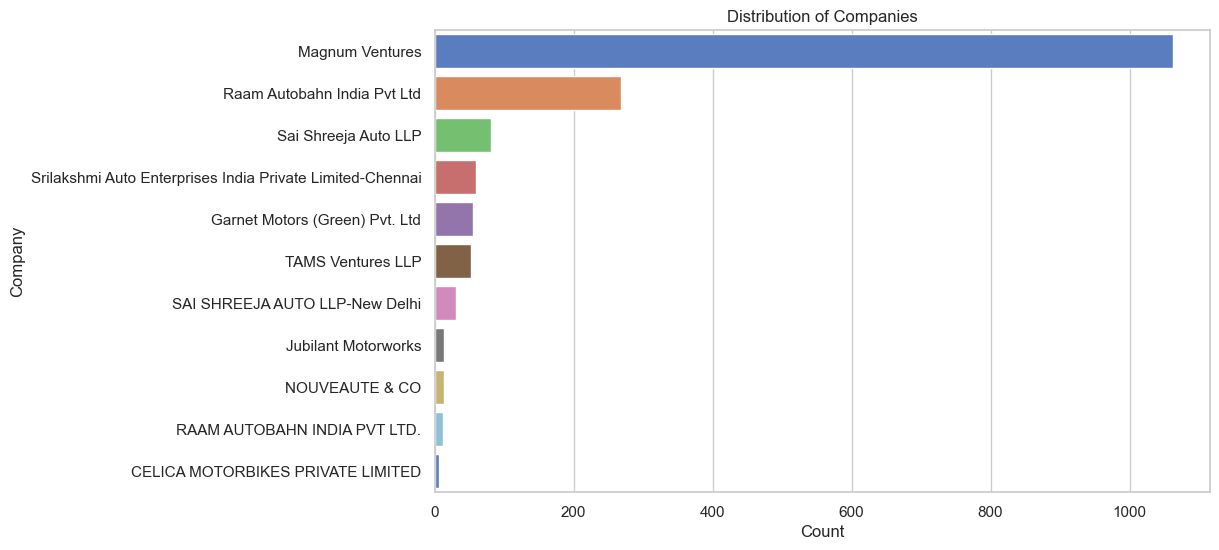

In [95]:
# Group the data by company and count the occurrences
company_distribution = df['Company'].value_counts().reset_index()
company_distribution.columns = ['Company', 'Count']

# Plot the distribution of companies
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Company', data=company_distribution, palette="muted")
plt.title('Distribution of Companies')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

**21. Total Amount Analysis**:
    Analyze the total amount spent on each service visit to identify outliers and trends in expenditure.


Total Amount Analysis:
count      1655.000000
mean       1720.260553
std        7964.723694
min           0.000000
25%         228.804750
50%         562.370000
75%        1558.000000
max      137047.090000
Name: Total Amount, dtype: float64


C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


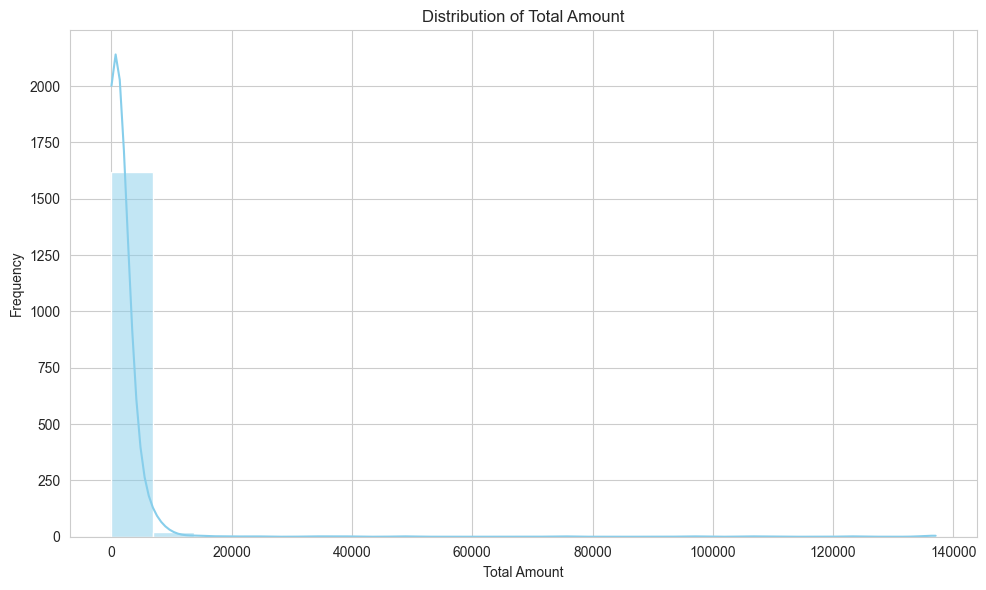

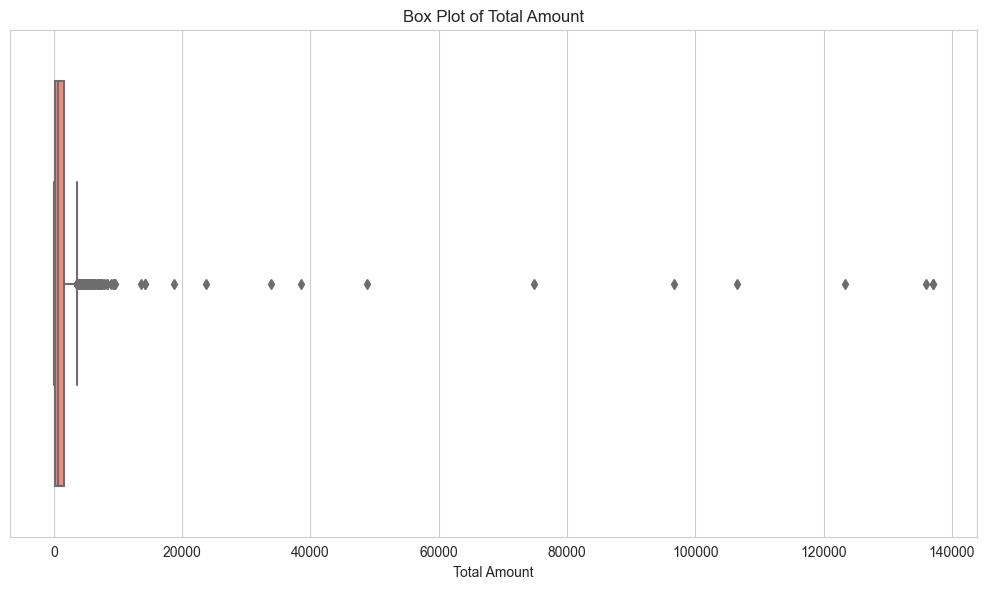

In [70]:
# Summary statistics of total amount
total_amount_stats = df['Total Amount'].describe()
print("Total Amount Analysis:")
print(total_amount_stats)
# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the histogram of total amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plotting the box plot of total amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total Amount'], color='salmon')
plt.title('Box Plot of Total Amount')
plt.xlabel('Total Amount')
plt.tight_layout()
plt.show()


**22. Top customers:-** Top customers by number of jobs.

Top Customers:
Customer
MAGENTA EV SOLUTIONS PRIVATE LTD        958
PI Beam Labs Pvt Ltd                    135
Magenta EV Solutions Pvt Ltd            112
ELEKTROWAGEN MOTORS THREE LLP            84
LIGHTNINGLOGISTICS PRIVATE LIMITED       62
LIGHTNINGLOGISTICS PRIVATE LIMITED       47
ELEKTROWAGEN MOTORS                      30
PI BEAM LABS PRIVATE LIMITED             29
Exponent Energy Private Limited          28
ELEKTROWAGEN MOTORS LLP                  17
Name: count, dtype: int64


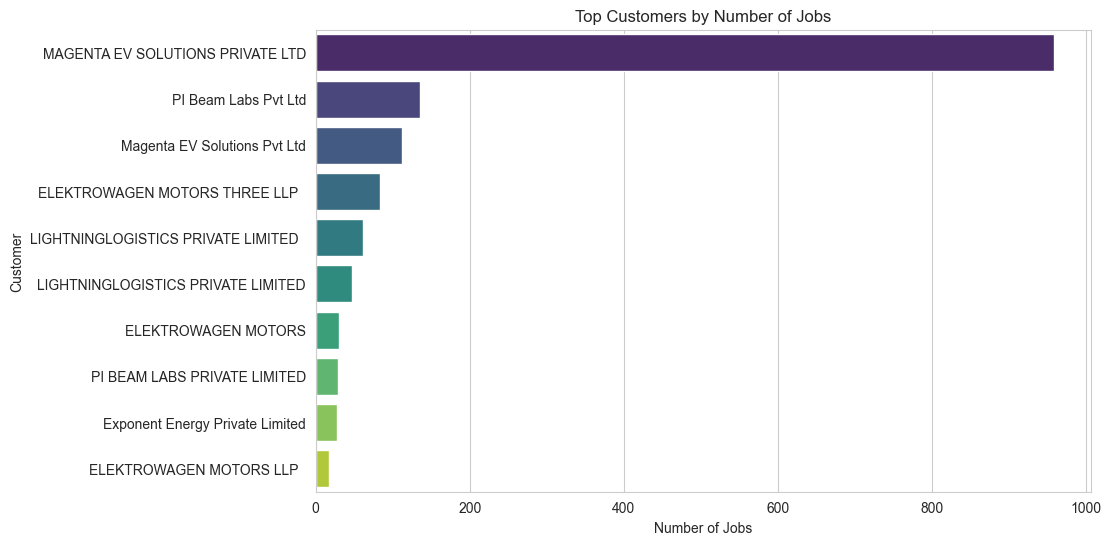

In [71]:
top_customers = df['Customer'].value_counts().head(10)
print("Top Customers:")
print(top_customers)
# Plotting the top customers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="viridis")
plt.title('Top Customers by Number of Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Customer')
plt.show()


**23. Total Amount by Repair Type**

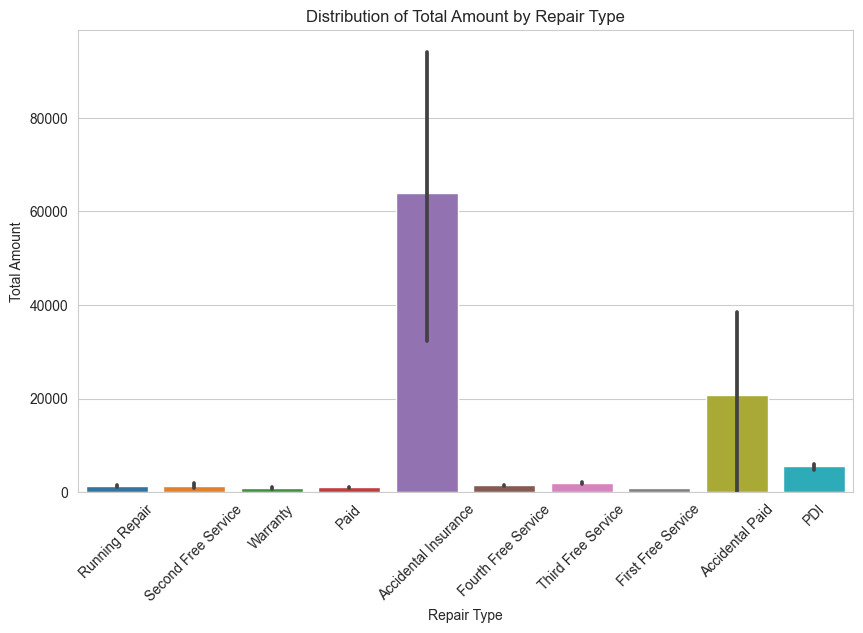

In [72]:
# Distribution of Total Amount by Repair Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Repair Type', y='Total Amount', data=df)
plt.title('Distribution of Total Amount by Repair Type')
plt.xlabel('Repair Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

**24. Make and Model Distribution :-** Explore the distribution of vehicle makes and models to understand the popularity of different brands and models.

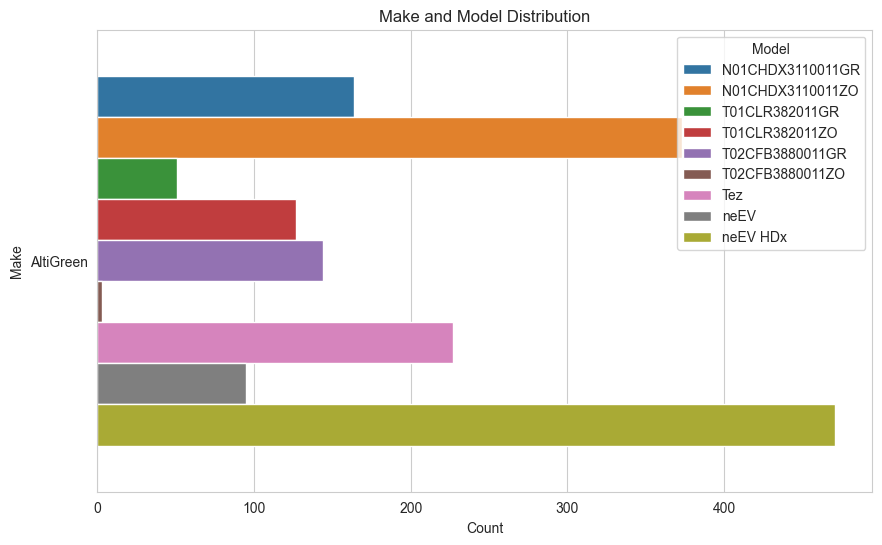

In [73]:
# Count occurrences of each Make and Model combination
make_model_distribution = df.groupby(['Make', 'Model']).size().reset_index(name='Count')

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Make', hue='Model', data=make_model_distribution)
plt.title('Make and Model Distribution')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

**25. Parts vs. Service Expenditure :-** Compare the total expenditure on parts vs. service to see if customers spend more on parts replacement or service labor.

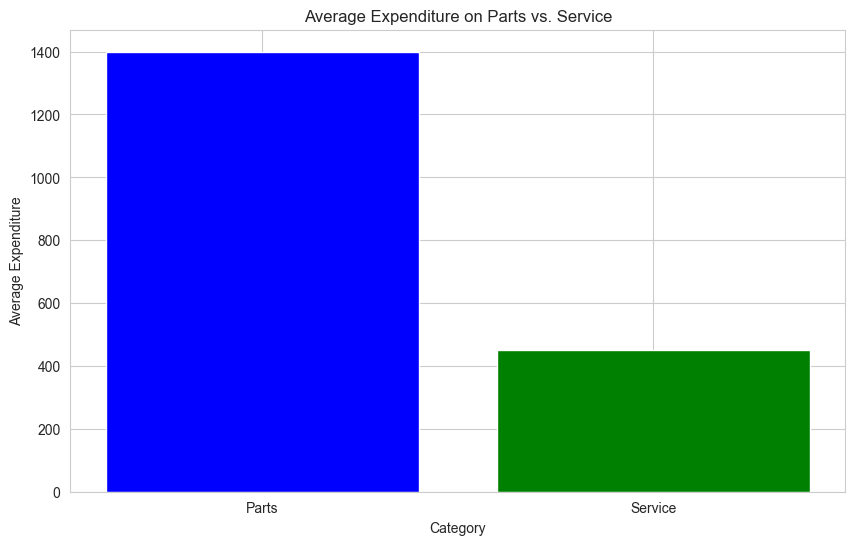

In [74]:
# Calculate total expenditure by summing up parts value and outside service value
df['Total Expenditure'] = df['Parts Value'] + df['Outside Service Value']

# Calculate average expenditure on parts and service
average_parts_expenditure = df['Parts Value'].mean()
average_service_expenditure = df['Outside Service Value'].mean()

# Visualize the comparison between parts and service expenditure
plt.figure(figsize=(10, 6))
plt.bar(['Parts', 'Service'], [average_parts_expenditure, average_service_expenditure], color=['blue', 'green'])
plt.title('Average Expenditure on Parts vs. Service')
plt.xlabel('Category')
plt.ylabel('Average Expenditure')
plt.show()

**26. Discount Distribution :-** Analyze the distribution of discounts applied to service visits to understand how frequently discounts are given and their impact on total expenditure.

C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


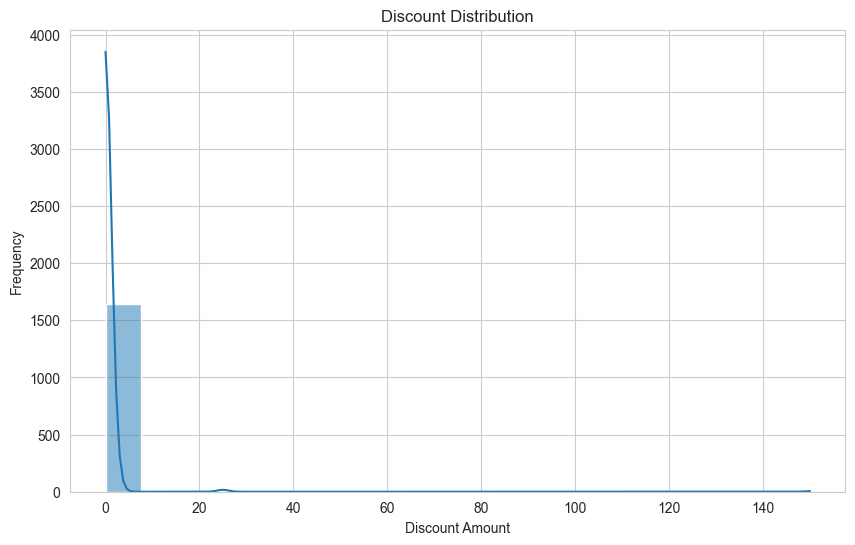

Percentage of visits with discounts: 18.01%


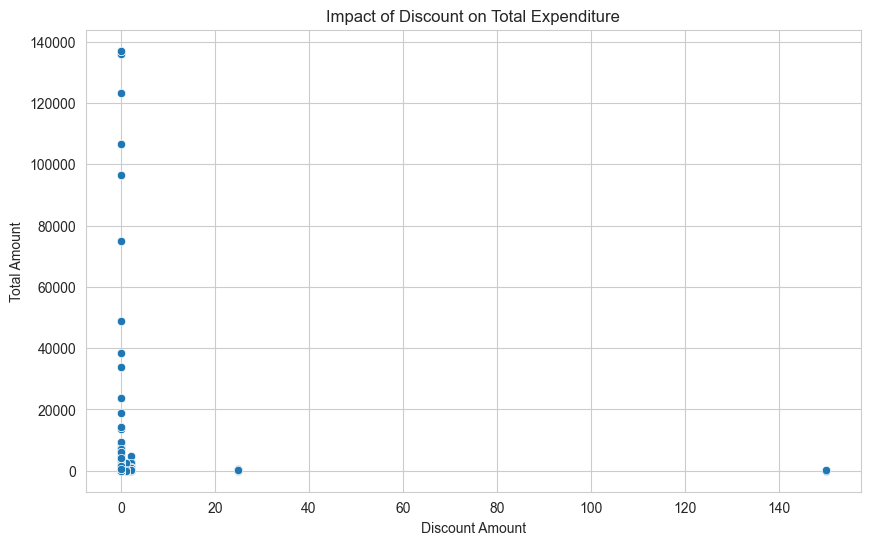

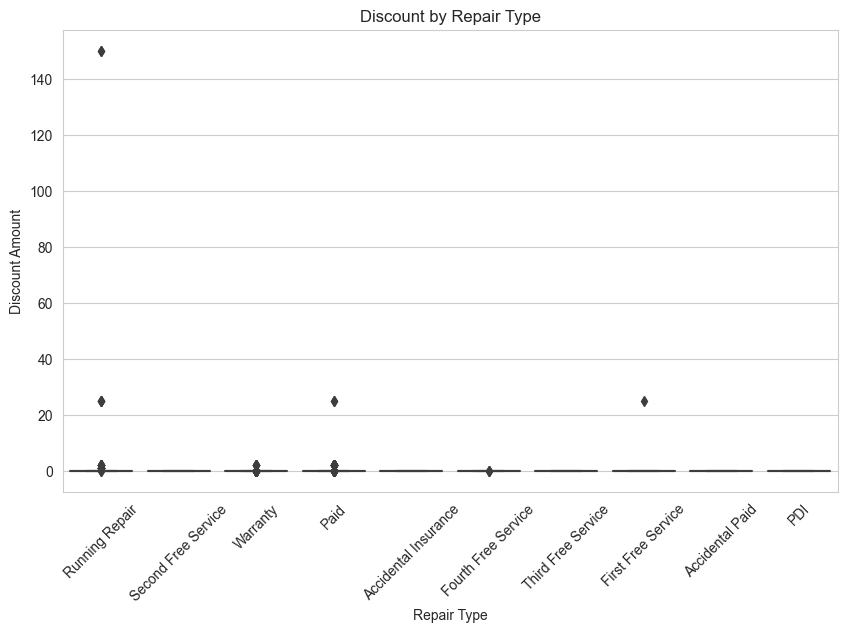

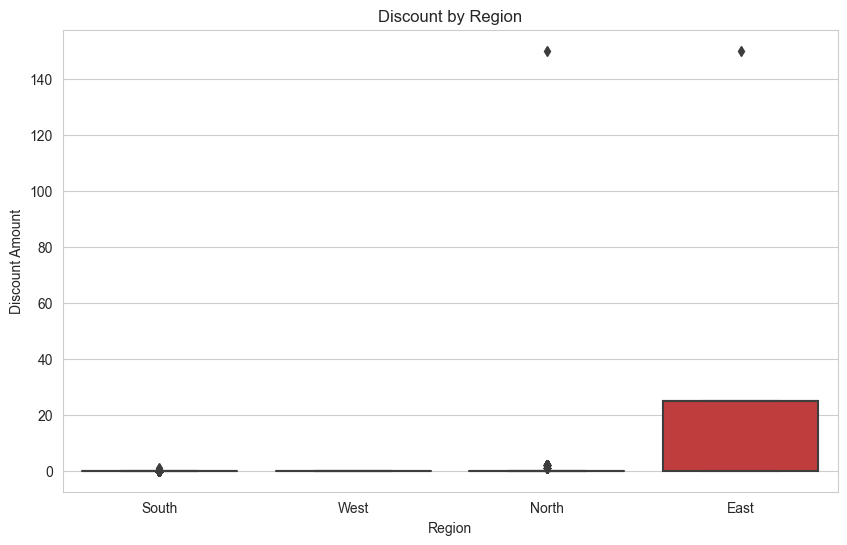

In [75]:
# Overall Discount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount'].dropna(), bins=20, kde=True)
plt.title('Discount Distribution')
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.show()

# Discount Frequency
discounted_visits = df[df['Discount'] > 0]
discounted_percentage = (len(discounted_visits) / len(df)) * 100
print(f"Percentage of visits with discounts: {discounted_percentage:.2f}%")

# Impact of Discount on Total Expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Total Amount', data=df)
plt.title('Impact of Discount on Total Expenditure')
plt.xlabel('Discount Amount')
plt.ylabel('Total Amount')
plt.show()

# Discount by Repair Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Repair Type', y='Discount', data=df)
plt.title('Discount by Repair Type')
plt.xlabel('Repair Type')
plt.ylabel('Discount Amount')
plt.xticks(rotation=45)
plt.show()

# Discount by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Discount', data=df)
plt.title('Discount by Region')
plt.xlabel('Region')
plt.ylabel('Discount Amount')
plt.show()

**27. Customer Loyalty :-** Analyze how many customers are repeat visitors and how often they come for service.

Top 10 Customers with the Highest Visit Frequency:
    Registration No  Job Card
512      TS09UD8766         9
439      TS08UK0612         8
16   3IM22K01000951         8
170      DL51GD4603         8
172      DL51GD4614         8
452      TS08UK1010         7
18   3IM22K01000961         7
197      DL51GD5264         7
190      DL51GD4773         6
440      TS08UK0614         6

Distribution of Visit Frequencies:
Job Card
1    254
2    136
3     67
4     26
5     18
6      9
8      4
7      3
9      1
Name: count, dtype: int64


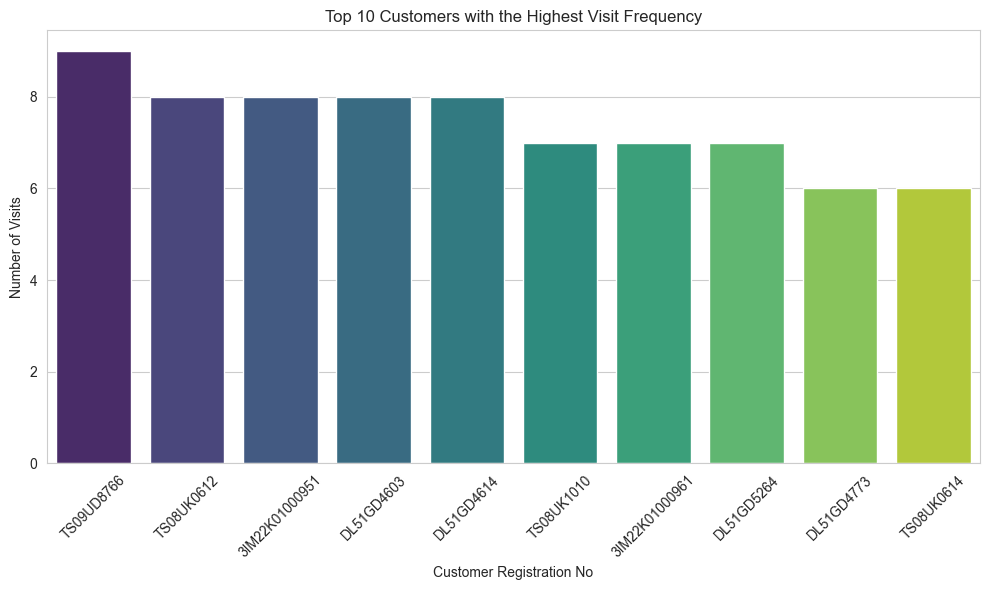

C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


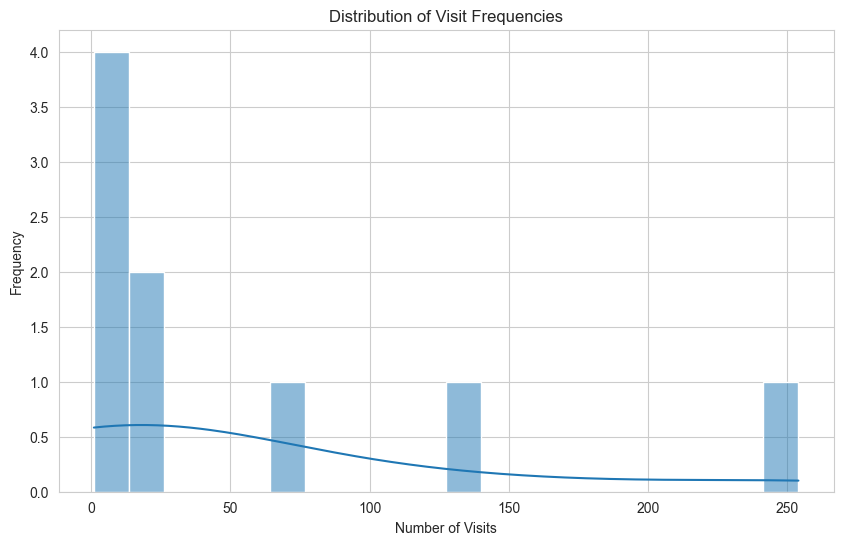

In [76]:
# Group by customer and count the number of visits
customer_visits = df.groupby('Registration No')['Job Card'].nunique().reset_index()

# Sort the customers by visit frequency
customer_visits = customer_visits.sort_values(by='Job Card', ascending=False)

# Display top 10 customers with the highest visit frequency
print("Top 10 Customers with the Highest Visit Frequency:")
print(customer_visits.head(10))

# Analyze distribution of visit frequencies
visit_frequency_distribution = customer_visits['Job Card'].value_counts()

# Display distribution of visit frequencies
print("\nDistribution of Visit Frequencies:")
print(visit_frequency_distribution)

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a bar plot for the top 10 customers with the highest visit frequency
plt.figure(figsize=(10, 6))
top_customers_plot = sns.barplot(x='Registration No', y='Job Card', data=customer_visits.head(10), palette='viridis')
top_customers_plot.set_title('Top 10 Customers with the Highest Visit Frequency')
top_customers_plot.set_xlabel('Customer Registration No')
top_customers_plot.set_ylabel('Number of Visits')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

# Plot distribution of visit frequencies
plt.figure(figsize=(10, 6))
sns.histplot(data=visit_frequency_distribution, bins=20, kde=True)
plt.title('Distribution of Visit Frequencies')
plt.xlabel('Number of Visits')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**28. Registration Frequency :-** Check if there are any specific registration numbers that frequently appear in the dataset, indicating potentially high-usage vehicles or loyal customers.

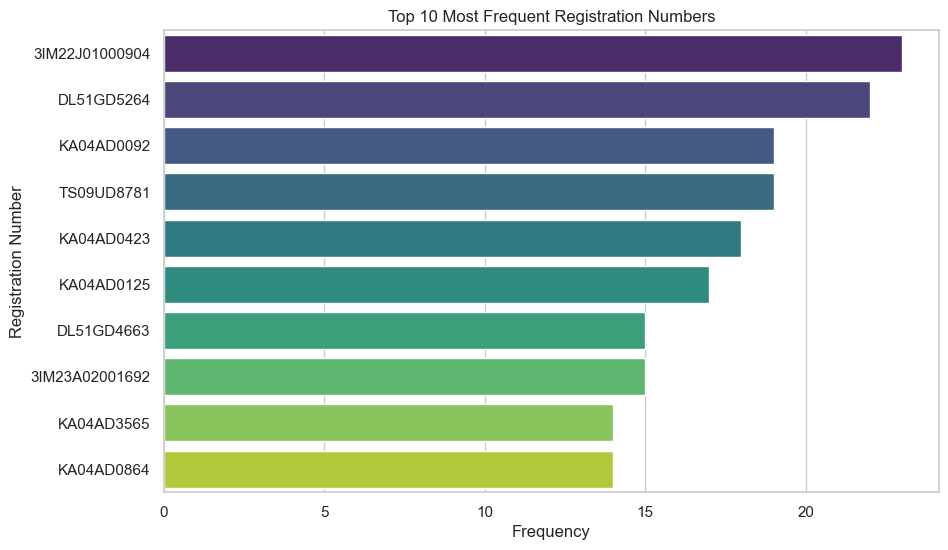

In [77]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Count the frequency of each registration number
registration_frequency = df['Registration No'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=registration_frequency.values, y=registration_frequency.index, palette="viridis")
plt.title('Top 10 Most Frequent Registration Numbers')
plt.xlabel('Frequency')
plt.ylabel('Registration Number')
plt.show()

**29. Service Frequency :-** Analyze how often each vehicle comes in for service to identify patterns of regular maintenance or irregular issues.

C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


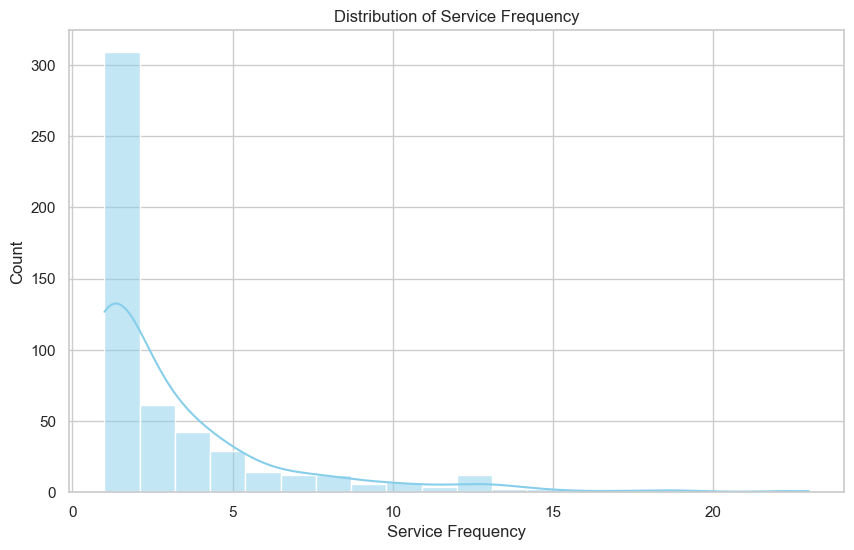

In [78]:
# Group the data by 'Registration No' and count the number of service visits for each vehicle
service_frequency = df.groupby('Registration No')['Job Card Date'].count().reset_index()
service_frequency.columns = ['Registration No', 'Service Frequency']

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(service_frequency['Service Frequency'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Service Frequency')
plt.xlabel('Service Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**30. Dealer Performance :-** Compare the total amount spent at different branches or dealerships to identify high-performing locations.

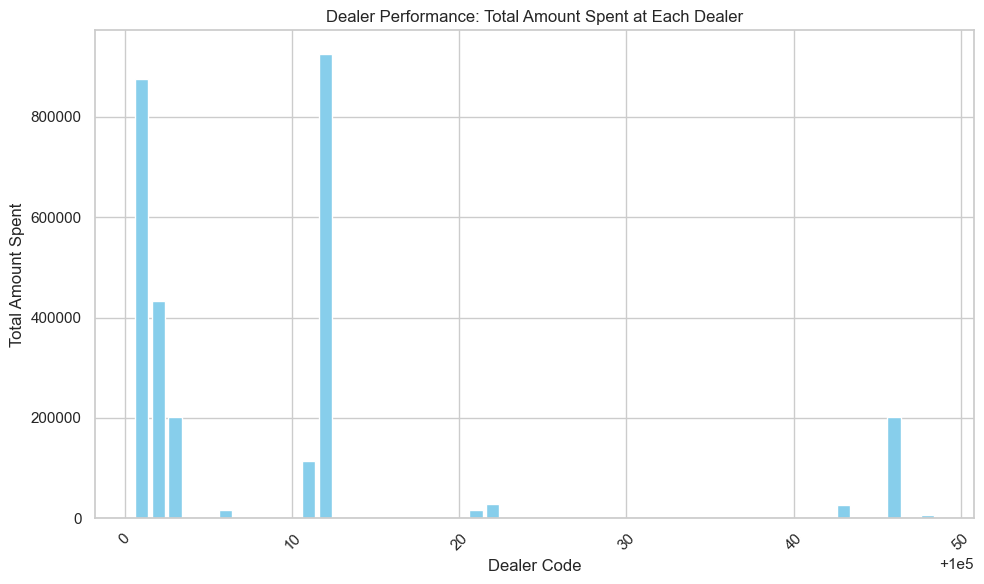

Top Performing Dealers or Branches:
   Dealer Code  Total Amount
5     100012.0   925826.0700
0     100001.0   875158.5155
1     100002.0   433386.1700
9     100046.0   201766.2000
2     100003.0   201023.2500


In [79]:
# Group the data by dealer or branch and calculate total amount spent
dealer_performance = df.groupby('Dealer Code')['Total Amount'].sum().reset_index()

# Sort dealers by total amount spent
dealer_performance_sorted = dealer_performance.sort_values(by='Total Amount', ascending=False)

# Plot the top performing dealers or branches
plt.figure(figsize=(10, 6))
plt.bar(dealer_performance_sorted['Dealer Code'], dealer_performance_sorted['Total Amount'], color='skyblue')
plt.xlabel('Dealer Code')
plt.ylabel('Total Amount Spent')
plt.title('Dealer Performance: Total Amount Spent at Each Dealer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, print the top performing dealers or branches
print("Top Performing Dealers or Branches:")
print(dealer_performance_sorted.head())

**31. Seasonal Trends :-** Check if there are any seasonal trends in service visits or expenditure, such as more repairs during certain months or seasons.

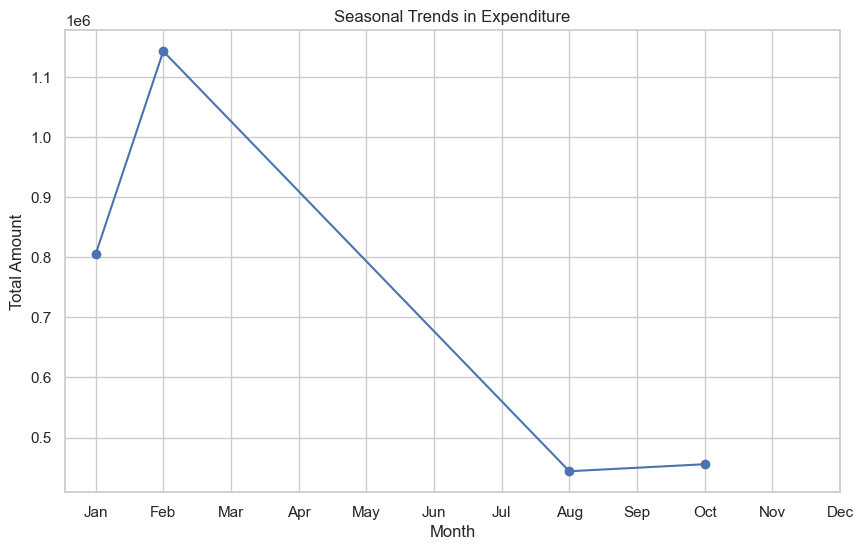

In [80]:
# Extract month from 'Job Card Date'
df['Month'] = df['Job Card Date'].dt.month

# Group by month and calculate total amount spent
monthly_expenditure = df.groupby('Month')['Total Amount'].sum()

# Plot the seasonal trends
plt.figure(figsize=(10, 6))
monthly_expenditure.plot(marker='o')
plt.title('Seasonal Trends in Expenditure')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**32. Service Duration :-** Analyze the duration of each service visit to identify if certain types of service take longer or shorter time to complete.

C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


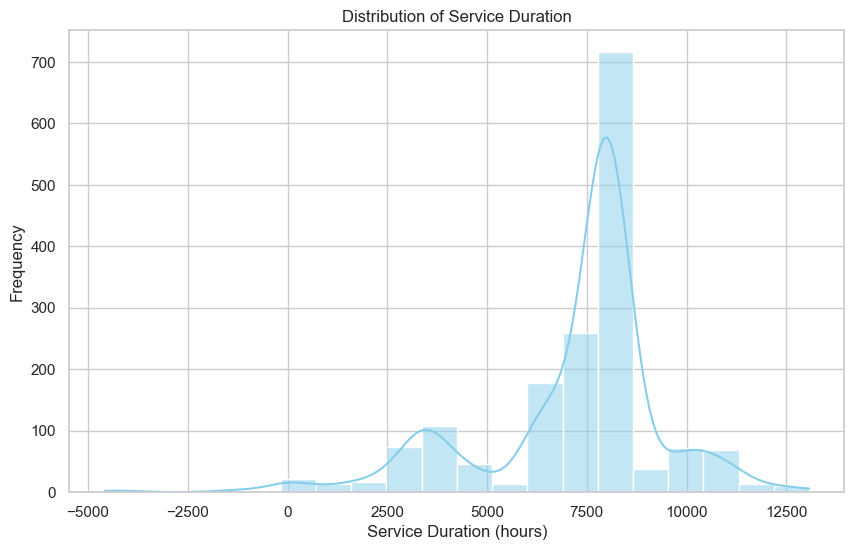

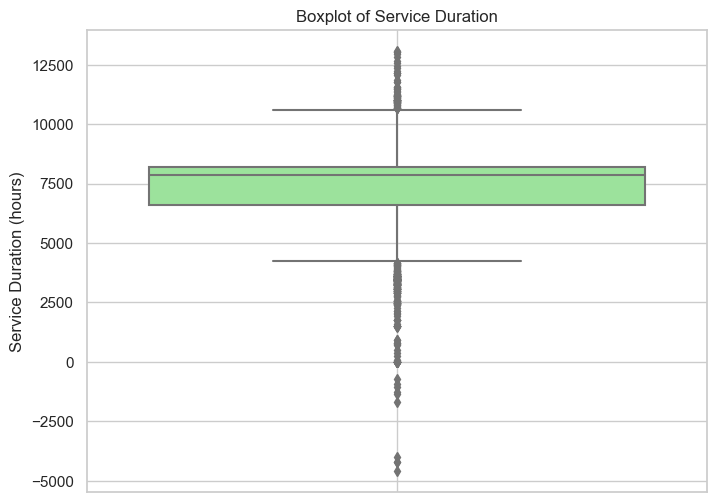

In [81]:
# Calculate service duration
df['Service Duration'] = df['Job Card Date'] - df['Sale Date'] 

# Convert service duration to hours
df['Service Duration Hours'] = df['Service Duration'].dt.total_seconds() / 3600

# Plot histogram of service duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Service Duration Hours'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Service Duration')
plt.xlabel('Service Duration (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot boxplot of service duration
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Service Duration Hours', color='lightgreen')
plt.title('Boxplot of Service Duration')
plt.ylabel('Service Duration (hours)')
plt.grid(True)
plt.show()

**33. Service vs. Warranty :-** Compare the expenditure on warranty services versus paid services to understand the impact of warranty coverage.


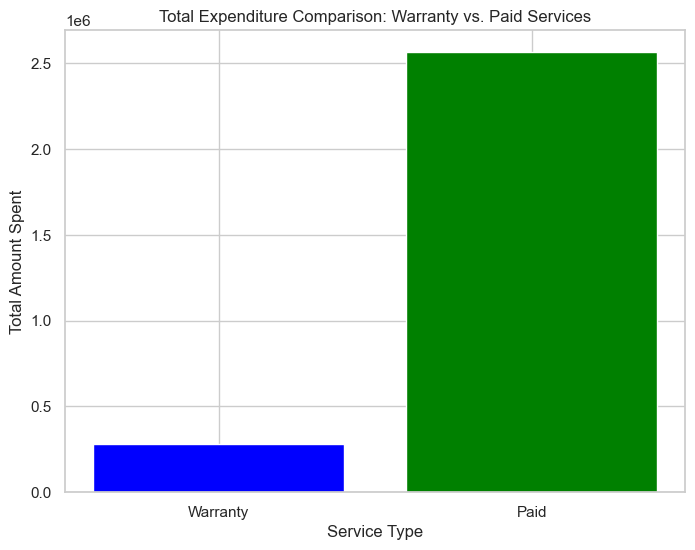

Total Expenditure on Warranty Services:  281792.944
Total Expenditure on Paid Services:  2565238.2715000003


In [82]:
# Filter data for warranty services
warranty_services = df[df['Repair Type'] == 'Warranty']

# Filter data for paid services
paid_services = df[df['Repair Type'] != 'Warranty']

# Calculate total expenditure for warranty and paid services
total_expenditure_warranty = warranty_services['Total Amount'].sum()
total_expenditure_paid = paid_services['Total Amount'].sum()

# Create a bar chart to visualize the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Warranty', 'Paid'], [total_expenditure_warranty, total_expenditure_paid], color=['blue', 'green'])
plt.title('Total Expenditure Comparison: Warranty vs. Paid Services')
plt.xlabel('Service Type')
plt.ylabel('Total Amount Spent')
plt.show()

# Print total expenditure for warranty and paid services
print("Total Expenditure on Warranty Services: ", total_expenditure_warranty)
print("Total Expenditure on Paid Services: ", total_expenditure_paid)

**34. Invoiced vs. Non-Invoiced Services :-** Analyze the distribution of invoiced and non-invoiced services to identify any discrepancies or trends.

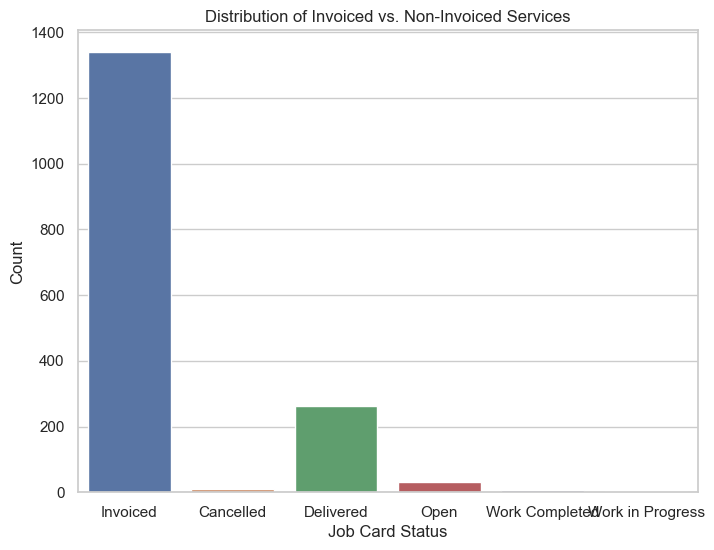

Total Amount Spent on Non-Invoiced Services: 731425.916


In [83]:
# Count the number of invoiced and non-invoiced services
invoice_counts = df['Job Card Status'].value_counts()

# Calculate total amount spent on invoiced and non-invoiced services
total_amount_invoice = df.loc[df['Job Card Status'] == 'Invoiced', 'Total Amount'].sum()
total_amount_non_invoice = df.loc[df['Job Card Status'] != 'Invoiced', 'Total Amount'].sum()

# Visualize the distribution of invoiced and non-invoiced services
plt.figure(figsize=(8, 6))
sns.countplot(x='Job Card Status', data=df)
plt.title('Distribution of Invoiced vs. Non-Invoiced Services')
plt.xlabel('Job Card Status')
plt.ylabel('Count')
plt.show()

# Compare the average amount spent on invoiced and non-invoiced services
average_amount_invoice = df.loc[df['Job Card Status'] == 'Invoiced', 'Total Amount'].mean()
average_amount_non_invoice = df.loc[df['Job Card Status'] == 'Non Invoiced', 'Total Amount'].mean()

# Print insights
print("Total Amount Spent on Non-Invoiced Services:", total_amount_non_invoice)

**35. Average Repair Costs :-** Calculate the average repair costs across different regions to identify areas with higher repair expenses.

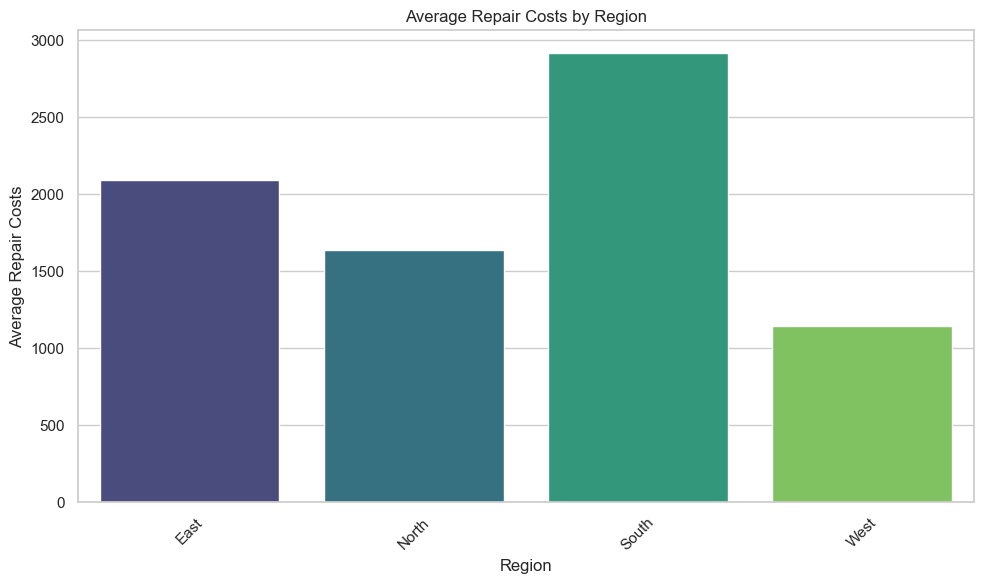

In [84]:
# Group the data by 'Region' and calculate the average repair costs
average_repair_costs = df.groupby('Region')[['Parts Value', 'Inside Service Value', 'Outside Service Value']].mean()

# Add a new column to calculate total average repair costs
average_repair_costs['Total Average Repair Costs'] = average_repair_costs.sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=average_repair_costs.index, y='Total Average Repair Costs', data=average_repair_costs, palette='viridis')
plt.title('Average Repair Costs by Region')
plt.xlabel('Region')
plt.ylabel('Average Repair Costs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**36. Average Parts Value :-** Calculate the average value of parts used in repairs to identify the most expensive parts.

Part/Service Name
Shock Absorber Front Bush                                           8463.872203
Rear wheel Rim Replace                                              8463.872203
Wheel _ Seat Lug Nut_M12                                            8463.872203
Rim                                                                 8463.872203
1st Free Service 2000 Km                                            4869.233658
HALF SHAFT / PROPELLER SHAFT RH                                     4574.481966
Flange Inner Cup                                                    4536.244611
Rear Axle Hub_RH                                                    4536.244611
Kit Boot And Retainer                                               3844.440136
Brake high pressure lines replace - Each hose                       3105.775139
HALF SHAFT / PROPELLER SHAFT LH                                     2923.884728
Propeller shaft replace (1 piece)                                   2874.868414
HP Pipe Rear Right    

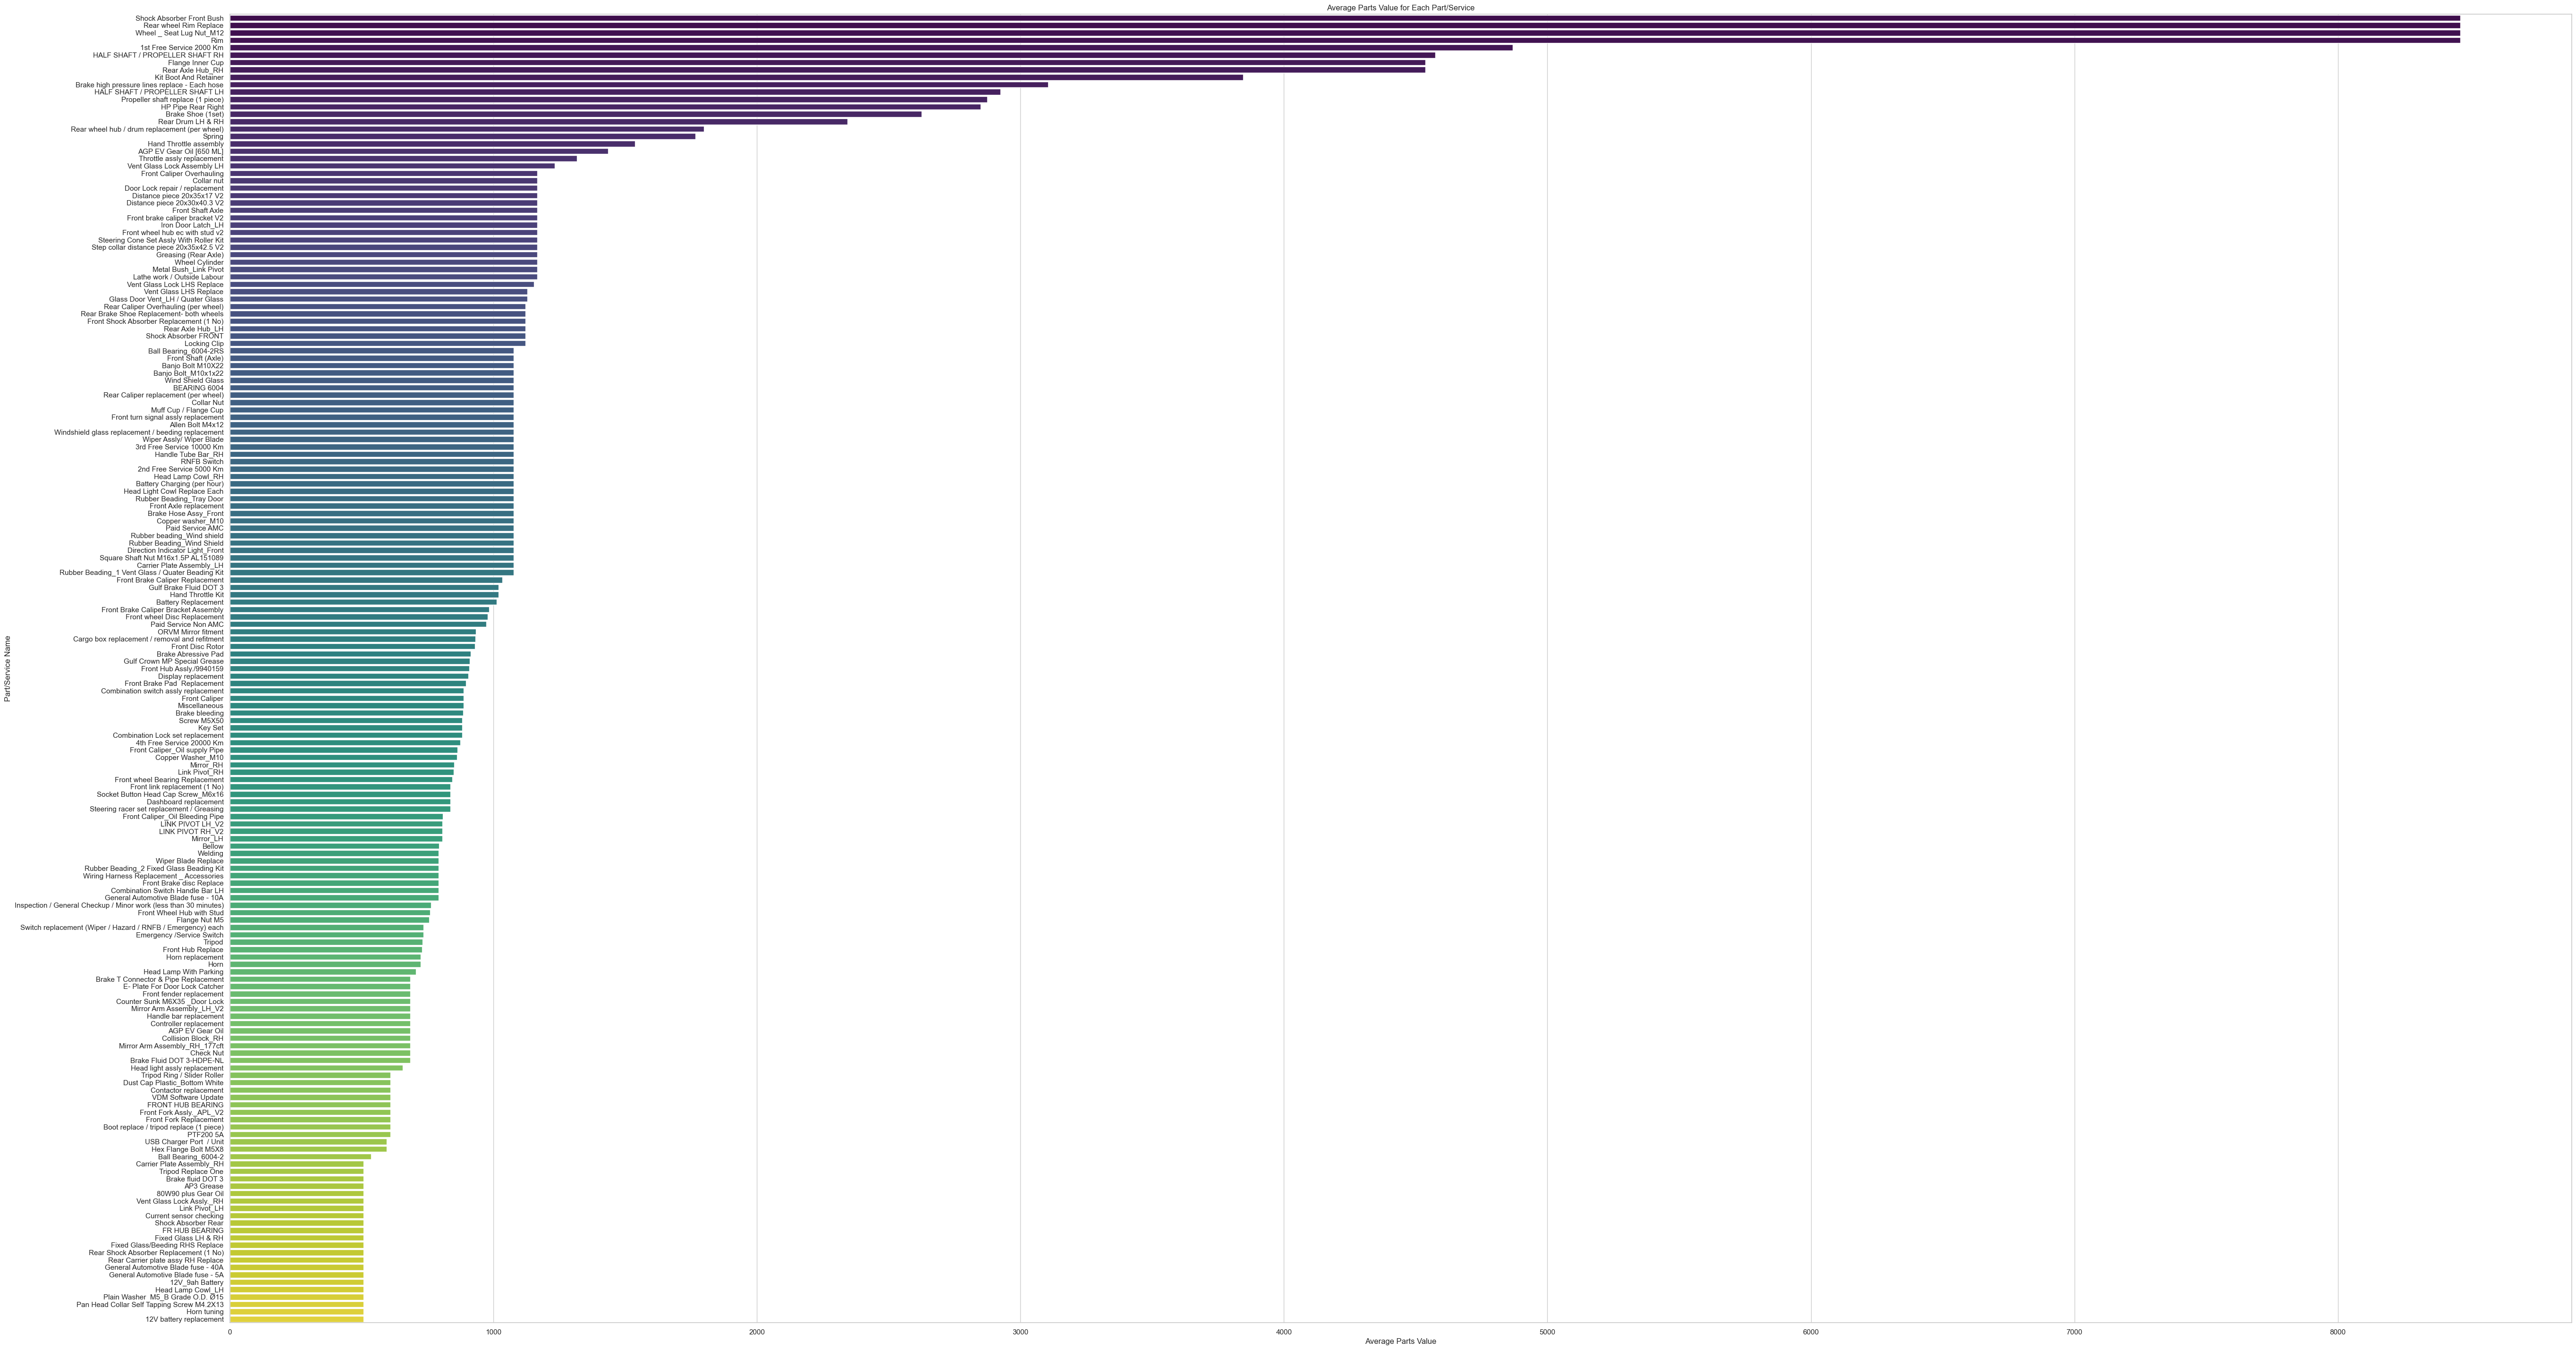

In [85]:
# Extracting relevant columns
parts_data = df[['Job Card', 'Part/Service Name', 'Parts Value']]

# Grouping by Part/Service Name and calculating average Parts Value
average_parts_value = parts_data.groupby('Part/Service Name')['Parts Value'].mean()

# Sorting to identify the most expensive parts
most_expensive_parts = average_parts_value.sort_values(ascending=False)

print(most_expensive_parts)

# Plotting the most expensive parts
plt.figure(figsize=(64, 36))
sns.barplot(x=most_expensive_parts.values, y=most_expensive_parts.index, palette='viridis')
plt.xlabel('Average Parts Value')
plt.ylabel('Part/Service Name')
plt.title('Average Parts Value for Each Part/Service')
plt.show()



**37. Average Inside Service Value :-** Analyze the average inside service value to understand additional services provided by the company.

Average Inside Service Value: 673.7088548750694


C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


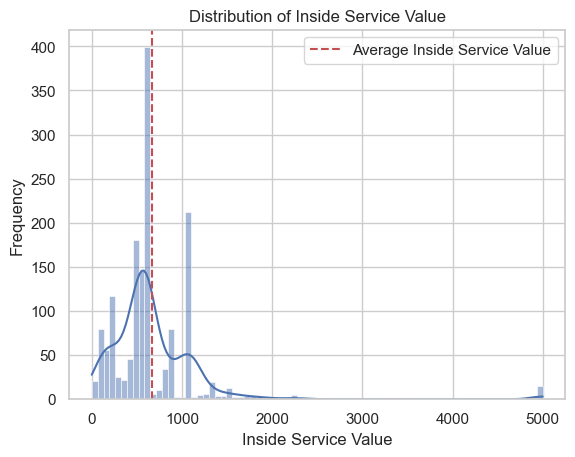

In [86]:
# Filter data where Inside Service Value is not zero
filtered_df = df[df['Inside Service Value'] != 0]

# Calculate average Inside Service Value
average_inside_service_value = filtered_df['Inside Service Value'].mean()

print("Average Inside Service Value:", average_inside_service_value)

# Replace 'filtered_df' with your DataFrame name if different
sns.histplot(filtered_df['Inside Service Value'], kde=True)
plt.title('Distribution of Inside Service Value')
plt.xlabel('Inside Service Value')
plt.ylabel('Frequency')
plt.axvline(average_inside_service_value, color='r', linestyle='--', label='Average Inside Service Value')
plt.legend()
plt.show()

**38. Average Outside Service Value :-** Investigate the average outside service value to identify common external services required.

Average Outside Service Value: 450.9554551208116


C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


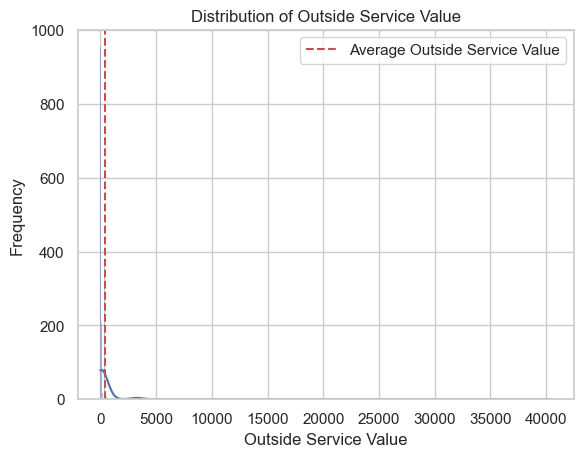

In [87]:
# Calculate the average outside service value
average_outside_service_value = df['Outside Service Value'].mean()

print("Average Outside Service Value:", average_outside_service_value)

# Replace 'df' with your DataFrame name if different
sns.histplot(df['Outside Service Value'], kde=True)
plt.title('Distribution of Outside Service Value')
plt.xlabel('Outside Service Value')
plt.ylabel('Frequency')
plt.axvline(average_outside_service_value, color='r', linestyle='--', label='Average Outside Service Value')
plt.legend()
plt.show()

**39. Total Amount Distribution :-** Analyze the distribution of total amounts to understand billing trends.

     Total Amount  Count
0          0.0000     60
1          0.0100     14
2          1.1800      7
3          4.0200      1
4          5.0000      2
5          6.0000      2
6         10.0000      5
7         12.0100      6
8         14.0000      2
9         15.0000      1
10        20.0100      3
11        20.9900      1
12        21.0000      1
13        23.8100      1
14        24.0000      3
15        25.4055      2
16        25.9900      2
17        25.9900      1
18        33.0100      1
19        33.9000      1
20        35.4000      5
21        38.0000      1
22        40.0000      8
23        41.3000      1
24        42.0000      3
25        44.0100      1
26        47.2000      1
27        48.0000      2
28        48.3100      1
29        50.0000      1
30        50.7910      3
31        56.6400      6
32        57.0100      4
33        59.0000      8
34        66.0000      1
35        68.0200      1
36        72.0000      1
37        74.0000      3
38        75.9900      1


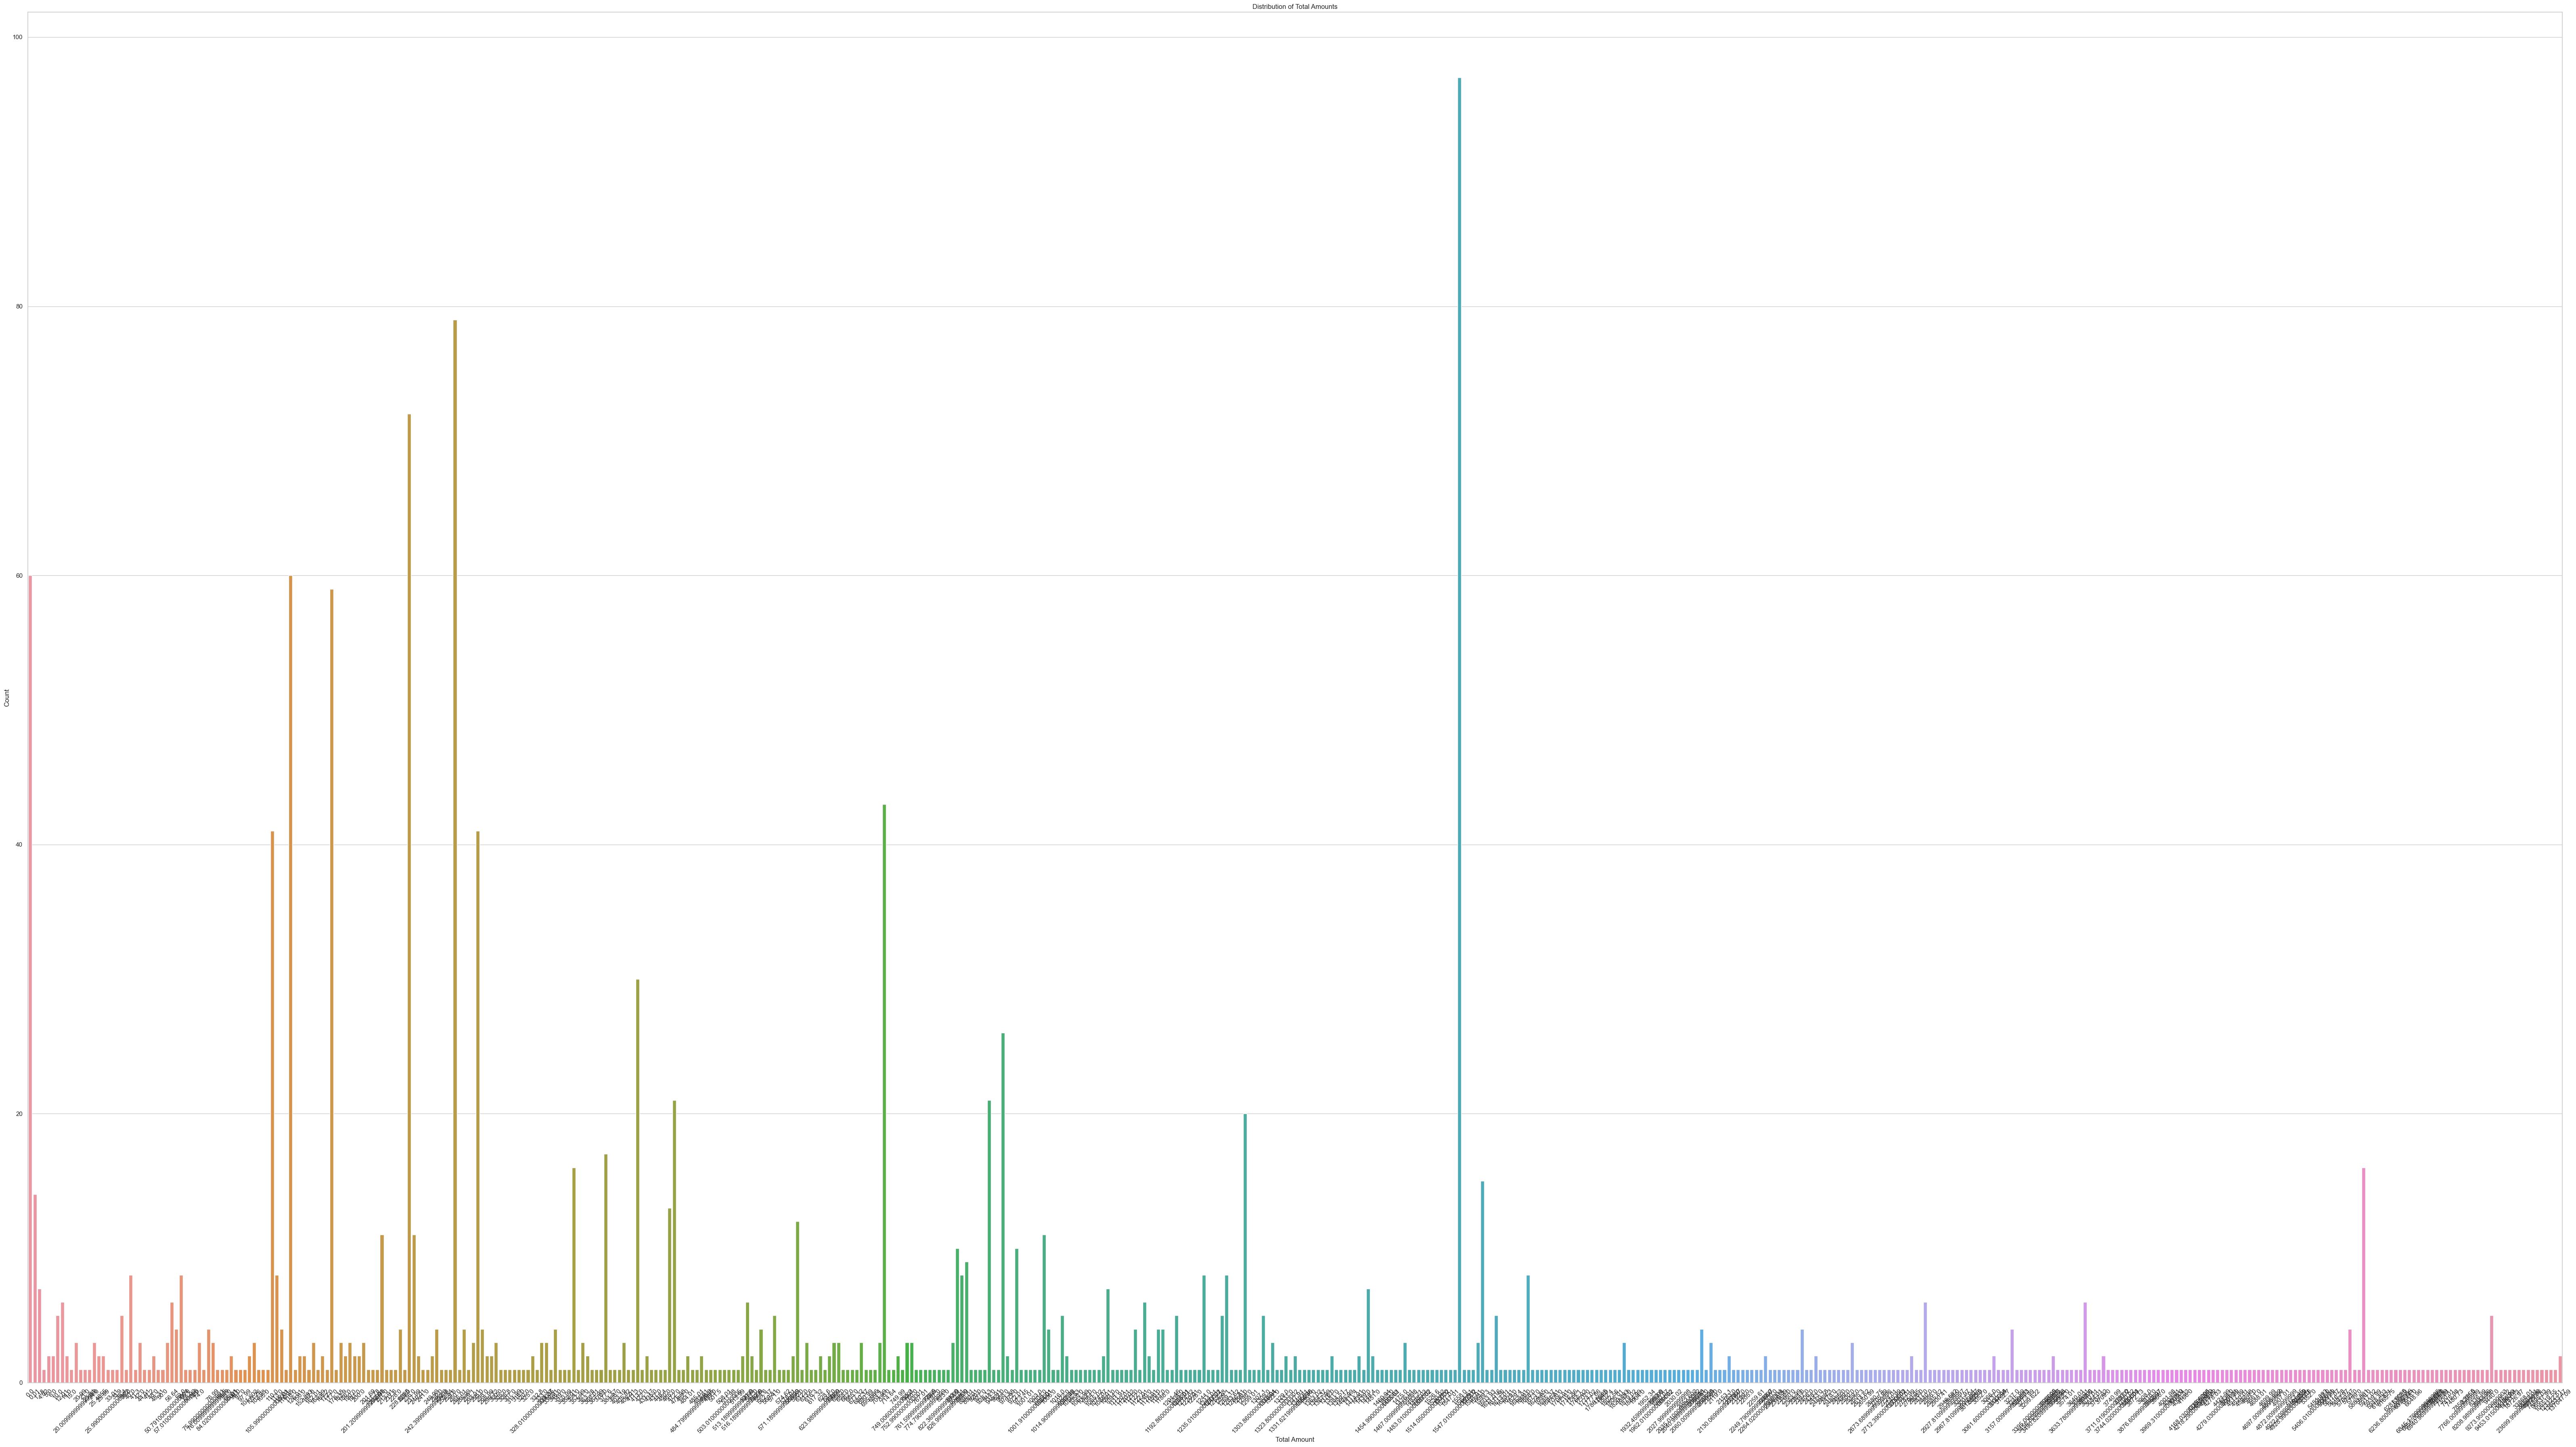

In [88]:
# Group by Total Amount and count the occurrences
amount_distribution = df.groupby('Total Amount').size().reset_index(name='Count')

print(amount_distribution)

# Plot
plt.figure(figsize=(64, 36))
sns.barplot(x='Total Amount', y='Count', data=amount_distribution)
plt.title('Distribution of Total Amounts')
plt.xlabel('Total Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**40. Lost Sale Analysis :-** Investigate the reasons for lost sales and their impact on revenue.

Total Lost Sales Value:  731425.916
Lost Sales by Reason: 
                                          Work Status  Count
0              0/1 Parts Job Done , 1/1 RO Job Done.       1
1                                    0/1 RO Job Done.      2
2               0/3 Parts Job Done , 0/1 WO Job Done.      1
3   0/3 Parts Job Done , 0/6 RO Job Done , 0/1 WO ...      1
4              0/3 Parts Job Done , 1/1 RO Job Done.       1
5                                 0/3 Parts Job Done.      1
6              0/5 Parts Job Done , 3/3 RO Job Done.       1
7              0/6 Parts Job Done , 1/1 RO Job Done.       1
8              0/8 Parts Job Done , 5/5 RO Job Done.       1
9   1/1 Parts Job Done , 1/1 RO Job Done , 1/1 WO ...      1
10             1/1 Parts Job Done , 1/1 RO Job Done.      97
11              1/1 Parts Job Done , 1/1 WO Job Done.      1
12             1/1 Parts Job Done , 2/2 RO Job Done.       1
13             1/1 Parts Job Done , 3/3 RO Job Done.       5
14                        

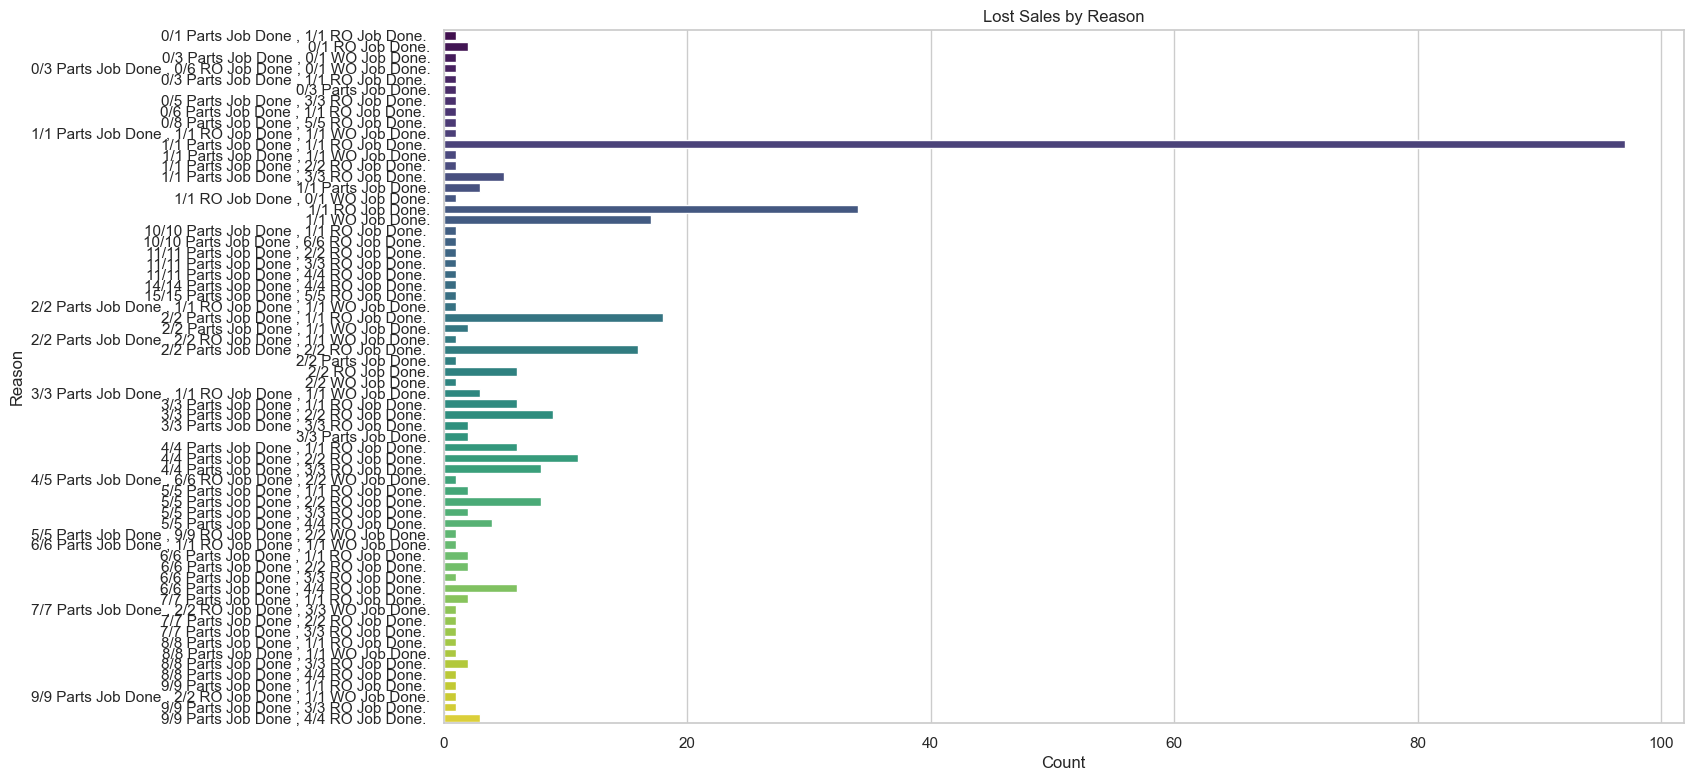

In [91]:
# Filter job cards where Job Card Status is not "Invoiced"
lost_sales = df[df['Job Card Status'] != 'Invoiced']

# Calculate the total lost sale value
total_lost_sales_value = lost_sales['Total Amount'].sum()

# Print the total lost sale value
print("Total Lost Sales Value: ", total_lost_sales_value)

# Group lost sales by reason
lost_sales_reasons = lost_sales.groupby('Work Status').size().reset_index(name='Count')

# Print lost sales by reason
print("Lost Sales by Reason: ")
print(lost_sales_reasons)

# Set the style for the plots
sns.set_style("whitegrid")

# Create a bar plot to visualize lost sales by reason
plt.figure(figsize=(16, 9))
sns.barplot(x='Count', y='Work Status', data=lost_sales_reasons, palette="viridis")
plt.title('Lost Sales by Reason')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()

**41. Vehicle Models Analysis :-** Explore the distribution of vehicle models to understand customer preferences.

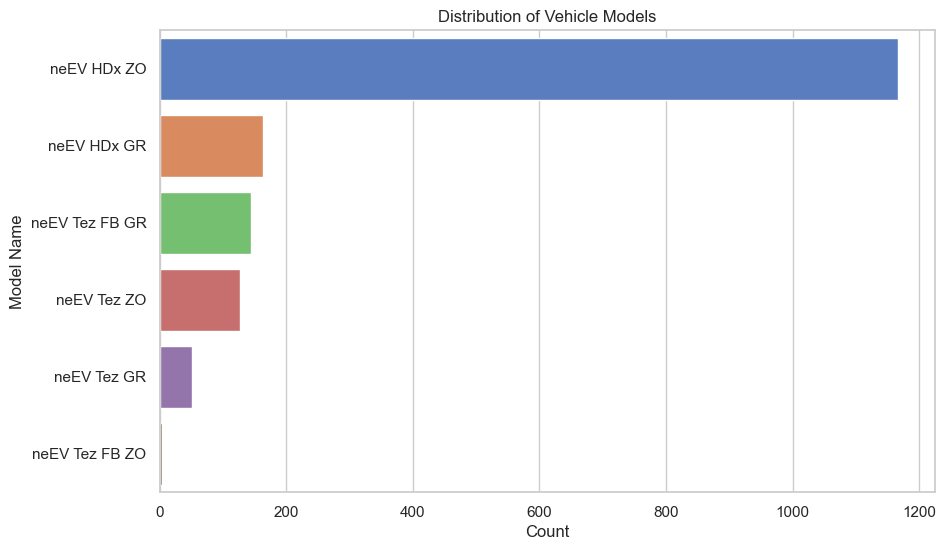

In [93]:
# Group the data by vehicle model and count the occurrences
vehicle_model_distribution = df['Model Name'].value_counts().reset_index()
vehicle_model_distribution.columns = ['Model Name', 'Count']

# Plot the distribution of vehicle models
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Model Name', data=vehicle_model_distribution, palette="muted")
plt.title('Distribution of Vehicle Models')
plt.xlabel('Count')
plt.ylabel('Model Name')
plt.show()

**Thank you**